# Банки — Анализ оттока и привлечение клиентов

### Задача**:**

Проанализируйте клиентов регионального банка и выделите сегменты клиентов, которые склонны оставаться в банке.

- Подготовьте данные
- Проведите исследовательский анализ данных, исследуйте взаимосвязи всех характеристик с оттоком разными методами, зафиксируйте какие клиенты склонны уходить из банка, а какие — оставаться в нём
- Разработайте бизнес-метрику, связанную с ценностью клиента
- По выделенным в исследовательском анализе критериям сегментируйте пользователей банка, выделяя наиболее лояльных (не уходящих из банка), приоритизируйте данные сегменты в соответствии с разработанной бизнес-метрикой
- Сформулируйте и проверьте статистические гипотезы.
    
    *Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.*
    
    *Сформулируйте и проверьте статистическую гипотезу относительно представленных данных*
    
- Дайте рекомендации по привлечению клиентов из приоритетных сегментов

## Загрузка и обзор данных

In [1]:
#Загрузка библиотек
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly import graph_objects as go
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
import statistics as stat

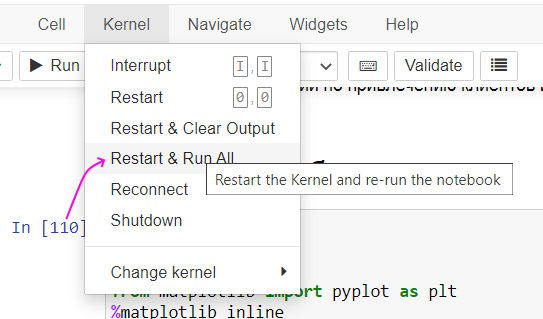

<div class="alert alert-danger"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Я заметил что первая ячейка имеет номер выполнения, отличный от <tt>[1]</tt>. Это может приводить к тому, что не вызовут ошибку какие-то изменения кода, которые вызвали бы ошибку после перезапуска ноутбука (или при его запуске на другой машине), например потому, что в памяти сохраняются переменные, которые были сформированы до того, как код был изменён. Поэтому важно выполнять ячейки с первой по последнюю строго последовательным образом перед тем, как отправлять их кому-то.
</div>

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;📝<br>
Хорошо, что в начале работы помещаешь описание проекта, это позволит читателям быстро понять, о чём работа. 

Импорт библиотек в самом начале позволит быстро понять, какое окружение нужно для ноутбука. Такой код проще поддерживать.

Если ты не используешь потом какие-то библиотеки или методы, их импорт можно закомментировать. Если передумаешь, то сможешь убрать пометки комментирования и всё снова заработает. 

<a href='https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html'>Материал по импорту.</a> Также есть простые правила — не стоит импортировать дважды одно и то же, желательно разбивать импорт на группы (отделять друг от друга переносами строк и комментариями), при этом импорт <a href='https://docs.python.org/3/library/index.html'>стандартных библиотек</a> стоит размещать в начале.
</div>

<div class="alert btn-primary"><b>Комментарий студента:</b><br>   Принято к сведению  </div>

In [2]:
# параметры формата десятичных дробей
pd.set_option('display.float_format', '{:.2f}'.format)

In [3]:
#Копирую ссылку из задания. Я выбрал обновленный датасет.
path = "https://drive.google.com/uc?export=download&id=1-U61mhTz_N1ARjy2XSAZ7IlQqGjeqP0F" 
df = pd.read_csv(path)

In [4]:
df

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0
3,225363,866.00,Ярославль,Ж,51.00,5,1524746.26,2,0,1,174423.53,1
4,157978,730.00,Ярославль,М,34.00,5,174.00,1,1,0,67353.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,120553,814.00,Рыбинск,М,27.00,1,78144.65,1,0,1,18943.64,0
9996,139170,894.00,Ярославль,М,46.00,0,NaN,1,1,0,196898.29,0
9997,115639,903.00,Ярославль,М,24.00,0,NaN,2,1,1,108905.09,0
9998,148700,777.00,Ярославль,Ж,68.00,3,865457.97,3,0,1,86874.90,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
#Приведем к нижнему регистру и переименуем столбец userid
df.columns = df.columns.str.lower()
df = df.rename(columns={'userid' : 'user_id'})
df.head(3)

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
0,183012,850.00,Рыбинск,Ж,25.00,1,59214.82,2,0,1,75719.14,1
1,146556,861.00,Рыбинск,Ж,37.00,5,850594.33,3,1,0,86621.77,0
2,120722,892.00,Рыбинск,Ж,30.00,0,NaN,1,1,1,107683.34,0


В нашем распоряжении датасет из 10000 записей. Можем приступать к предобработке данных.

## Предобработка данных

### Кодирование городов

In [8]:
df['city'].value_counts()

Ярославль    5888
Рыбинск      2695
Ростов       1417
Name: city, dtype: int64

In [9]:
#Решил сделать новые колонки простым присвоением. Про существование pandas.get_dummies в курсе
df['Yaroslavl'] = 0
df['Rybinsk'] = 0
df['Rostov'] = 0
df.loc[df['city'] == 'Ярославль', 'Yaroslavl'] = 1
df.loc[df['city'] == 'Рыбинск', 'Rybinsk'] = 1
df.loc[df['city'] == 'Ростов', 'Rostov'] = 1

#Проверим правильность заполнения
display (df['Yaroslavl'].value_counts(), 
         df['Rybinsk'].value_counts(), 
         df['Rostov'].value_counts())

1    5888
0    4112
Name: Yaroslavl, dtype: int64

0    7305
1    2695
Name: Rybinsk, dtype: int64

0    8583
1    1417
Name: Rostov, dtype: int64

Колонки с кодификацией городов добавлены. После проверки цифры совпадают со значением value_counts()

<div class="alert alert-success"><b>Комментарий ревьюера&nbsp;<big>👍</big></b></div>

### Обработка пропусков

#### Столбец Age

Проверим, есть ли закономерномерности в распределении пропусков в столбце age

In [10]:
display(df[df['age'].isna()])

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Yaroslavl,Rybinsk,Rostov
1247,228075,932.00,Ярославль,М,NaN,5,7601719.20,2,1,1,408121.16,0,1,0,0
2165,187635,692.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,160368.82,0,0,1,0
2444,221156,913.00,Ярославль,М,NaN,0,NaN,1,1,1,135693.24,0,1,0,0
3091,138660,836.00,Ростов,Ж,NaN,5,294315.53,2,0,1,63310.22,1,0,0,1
4912,210674,834.00,Рыбинск,М,NaN,1,238330.52,2,0,1,93775.06,0,0,1,0
5470,218868,827.00,Рыбинск,Ж,NaN,4,448959.07,2,1,1,67835.95,0,0,1,0
5495,151662,884.00,Рыбинск,Ж,NaN,0,NaN,1,1,1,137500.77,0,0,1,0
7236,210135,908.00,Рыбинск,Ж,NaN,4,1120340.31,3,1,1,85002.15,0,0,1,0
7248,219343,920.00,Рыбинск,Ж,NaN,0,NaN,1,1,0,159248.67,0,0,1,0
7345,184913,829.00,Ярославль,Ж,NaN,3,188648.77,2,0,1,75206.90,0,1,0,0


<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🚫<br>
Не стоит делать print датасетов.
</div>

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Учтено, заменил на display
</div>

<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>✔️</big></b></div>

Закономерности в распределении пропусков в столбце age нет. Пропуски, скорее всего, случайны. Так как мы планируем в дальнейшем категоризировать показатели возраста, заполнение просто медианой или средним значением можем дать необоснованный результат в группе, куда попадет медианное значение. Поэтому, считаю целесообразным заполнить пропуска случайными значениями между 25-м и 75-м персентилем. Для этого изучим распределение значений в столбце age.

In [11]:
df['age'].describe()

count   9974.00
mean      42.73
std       12.18
min       18.00
25%       33.00
50%       40.00
75%       51.00
max       86.00
Name: age, dtype: float64

In [12]:
#Заполним пропуски случайными значениями возраста между 33 и 51
df['age'] = df['age'].fillna(np.random.randint(33, 51))

In [13]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            10000 non-null  float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  est_salary     10000 non-null  float64
 11  churn          10000 non-null  int64  
 12  Yaroslavl      10000 non-null  int64  
 13  Rybinsk        10000 non-null  int64  
 14  Rostov         10000 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 1.1+ MB


None

In [14]:
#Проверка. Как мы видим, среднее и медиана не сместились.
df['age'].describe()

count   10000.00
mean       42.72
std        12.17
min        18.00
25%        33.00
50%        40.00
75%        51.00
max        86.00
Name: age, dtype: float64

In [15]:
#Проверка 2
display(df[df['user_id'] == 228075], df[df['user_id'] == 187635])

,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Yaroslavl,Rybinsk,Rostov
1247,228075,932.00,Ярославль,М,39.00,5,7601719.20,2,1,1,408121.16,0,1,0,0
6457,228075,839.00,Рыбинск,М,39.00,5,507199.85,3,0,1,85195.80,0,0,1,0


,user_id,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Yaroslavl,Rybinsk,Rostov
918,187635,918.00,Ярославль,Ж,44.00,0,NaN,1,1,1,162497.52,0,1,0,0
2165,187635,692.00,Рыбинск,Ж,39.00,0,NaN,1,1,1,160368.82,0,0,1,0


#### Столбец balance

Пропуски в столбце balance вызывают особенное удивление. Ведь баланс - основная метрика для клиента банка. Я еще остановлюсь на этом далее. Пока - проверим распределение данных пропусков.

In [16]:
nan_balance = df[df['balance'].isna()]

In [17]:
nan_balance.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Yaroslavl,Rybinsk,Rostov
count,2295.00,2295.00,2295.00,2295.00,0.00,2295.00,2295.00,2295.00,2295.00,2295.00,2295.00,2295.00,2295.00
mean,172069.45,865.35,42.07,0.05,NaN,1.16,0.82,0.55,226310.21,0.01,0.64,0.26,0.10
std,33337.08,89.60,11.90,0.23,NaN,0.40,0.39,0.50,199771.79,0.08,0.48,0.44,0.30
min,114182.00,642.00,18.00,0.00,NaN,0.00,0.00,0.00,20274.03,0.00,0.00,0.00,0.00
25%,143095.50,871.00,33.00,0.00,NaN,1.00,1.00,0.00,120347.70,0.00,0.00,0.00,0.00
50%,172659.00,903.00,40.00,0.00,NaN,1.00,1.00,1.00,174160.68,0.00,1.00,0.00,0.00
75%,201551.00,922.00,49.00,0.00,NaN,1.00,1.00,1.00,240014.99,0.00,1.00,1.00,0.00
max,229145.00,990.00,86.00,3.00,NaN,3.00,1.00,1.00,1333687.36,1.00,1.00,1.00,1.00


In [18]:
#Сравним с распределением значений в оригинальном датафрейме
df.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Yaroslavl,Rybinsk,Rostov
count,10000.00,10000.00,10000.00,10000.00,7705.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,171814.71,848.70,42.72,2.63,827794.31,1.87,0.68,0.52,147866.89,0.18,0.59,0.27,0.14
std,33708.24,65.45,12.17,1.98,1980614.15,0.79,0.47,0.50,139388.51,0.39,0.49,0.44,0.35
min,94561.00,642.00,18.00,0.00,0.00,0.00,0.00,0.00,2546.30,0.00,0.00,0.00,0.00
25%,142810.25,802.00,33.00,0.00,295554.16,1.00,0.00,0.00,75251.90,0.00,0.00,0.00,0.00
50%,172728.00,853.00,40.00,3.00,524272.20,2.00,1.00,1.00,119658.10,0.00,1.00,0.00,0.00
75%,201261.75,900.00,51.00,4.00,980705.85,2.00,1.00,1.00,174500.54,0.00,1.00,1.00,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00,1.00,1.00,1.00


In [19]:
nan_balance['city'].value_counts()

Ярославль    1467
Рыбинск       593
Ростов        235
Name: city, dtype: int64

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🚫<br>Рассматривая только строки с пропусками мы, например, видим, что пропусков много в одном из городов. Но никак интерпретировать это не можем, так как это, возможно, просто самый большой город, в котором у нас больше всего клиентов.

Также распределение значений в тех строках, в которых встречаются пропуски, сами по себе, за исключением каких-то крайних случаев, не покажут нам, аномальное это распределение, отличается оно от распределения строк без пропусков или нет.
</div>

Можем сделать вывод, что распределение по городам, среди тех, у кого отсутствуют данные о балансе, идентнично распределению во всем датафрейме.

In [20]:
#Добавим столбец, где отметим факт наличия пропуска в столбце "balance"
df['nan_balance'] = 0
df.loc[df['balance'].isna(), 'nan_balance'] = 1

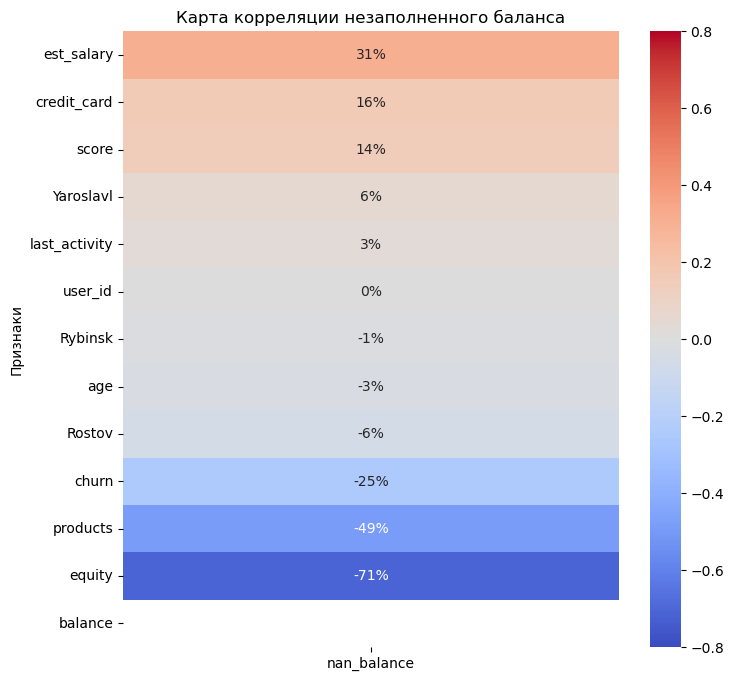

In [21]:
#Построим матрицу корреляции - в данном случае нас интересует корреляция с параметром nan_balance
#Данные по городам и по возрасту не включаю, так как очевидно отсуствие корреляции (см таблицы выше)
df_corr_nan_balance = df.corr().drop('nan_balance').sort_values('nan_balance', ascending=False)

plt.figure(figsize=(8, 8))
sns.heatmap(df_corr_nan_balance[['nan_balance']], annot=True, fmt='.0%', vmin=-0.8, vmax=0.8, center=0, cmap='coolwarm')
plt.title('Карта корреляции незаполненного баланса')
plt.ylabel('Признаки')
plt.show()

**Вывод** 

Заметна обратная корреляция с параметром equity и products, также имеется положительная корреляция с зарплатой.

Можно выдвинуть гипотезу, что те люди, у которыех не указан баланс - ипотечники. У них достаточно высокая зарплата при этом в большинстве случаев отсутствует собственная недвижимость. 
Однако, проверить эту гипотезу в рамках данного исследования не представляется возможным.

Пропуска оставляем, так как мы не можем заполнить их без серьезного искажения данных.
Также добавим столбец, указывающий на наличие пропуска в столбце balance.

Датафрейм готов к исследовательскому анализу.

<div class="alert alert-success"><b>Комментарий ревьюера&nbsp;<big>👍</big></b></div>


<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🚫<br>
Не удалена аномалия из продуктов.
</div>

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Не совсем понял, о какой аномалии идет речь? Если речь о столбце с продуктами, то аномалии я здесь не вижу. Разве что мы можем исправить пользователя, который использует 0 продуктов. Назначим для него значение количества продуктов 1.
    
   Скорее аномалию можно увидеть в столбце equity. где после значения 5 идет резкий обвал значений. Возможно произшло такое из-за того, что кого-то оценивали по 5-бальной шкале, а кого-то по 10-бальной? Мы можем приравнять все значения выше 5 к 5. Таким образом, мы избавимся от экстремальных значений, не потеряв остальных данных.
</div>

<div class="alert alert-success"><b>Комментарий ревьюера 2</b>&nbsp;📝<br>
У действующего клиента банка не может быть 0 продуктов. Видимо скрипт по удалению пользователей не успел отработать. 
</div>

Проанализируем столбец с продуктами

In [22]:
display(df['products'].value_counts())

2    5126
1    3341
3    1039
4     474
5      19
0       1
Name: products, dtype: int64

In [23]:
df['products'] = df['products'].replace(0, 1)
display(df['products'].value_counts())

2    5126
1    3342
3    1039
4     474
5      19
Name: products, dtype: int64

В столбце с продуктами все в порядке

In [24]:
display(df['equity'].value_counts())

0    2592
5    1918
4    1850
3    1543
2    1052
1     774
6     161
7      80
8      17
9      13
Name: equity, dtype: int64

In [25]:
#df = df[df['equity'] < 6]
#df.loc[df['equity'] > 5, 'equity'] = 5

<div class="alert alert-warning"><b>Комментарий ревьюера 2</b>&nbsp;⚠️<br>
Аномалии — это какое-то явное несоответствие логике. Тут явного несоответствия нет. Ты придумал какую-то логику и решил поменять в связи с ней датасет. Подобное действие может сильно подвести в будущем. Однако тут это не приводит к критическим ошибкам.
</div>

## Исследовательский анализ данных

Посмотрим на параметры столбцов датафрейма

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,10000.00,171814.71,33708.24,94561.00,142810.25,172728.00,201261.75,229145.00
score,10000.00,848.70,65.45,642.00,802.00,853.00,900.00,1000.00
age,10000.00,42.72,12.17,18.00,33.00,40.00,51.00,86.00
equity,10000.00,2.63,1.98,0.00,0.00,3.00,4.00,9.00
balance,7705.00,827794.31,1980614.15,0.00,295554.16,524272.20,980705.85,119113552.01
products,10000.00,1.87,0.79,1.00,1.00,2.00,2.00,5.00
credit_card,10000.00,0.68,0.47,0.00,0.00,1.00,1.00,1.00
last_activity,10000.00,0.52,0.50,0.00,0.00,1.00,1.00,1.00
est_salary,10000.00,147866.89,139388.51,2546.30,75251.90,119658.10,174500.54,1395064.45
churn,10000.00,0.18,0.39,0.00,0.00,0.00,0.00,1.00


Отдельно изучим средние показатели по оттоку клиентов

In [27]:
churn_data = df.groupby('churn').agg('mean').T
churn_data

churn,0,1
user_id,172004.36,170962.35
score,845.43,863.40
age,43.01,41.45
equity,2.37,3.76
balance,733982.59,1133993.27
products,1.76,2.38
credit_card,0.71,0.55
last_activity,0.48,0.70
est_salary,147783.20,148243.01
Yaroslavl,0.58,0.61


<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Надо добавить ещё один столбец (показатель отточных делить на показатель неотточных минус один) с относительной разницей и отсортировать по нему, сделать выводы.
</div>

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Столбец добавил. Анализ столбца ниже
</div>

In [28]:
churn_data = churn_data.rename(columns={0: 'no_churn_stats', 1: 'churn_stats'})
churn_data['churn_ratio'] = churn_data['churn_stats']/(churn_data['no_churn_stats']) - 1
churn_data = churn_data.sort_values(by = 'churn_ratio', ascending = False)
churn_data

churn,no_churn_stats,churn_stats,churn_ratio
equity,2.37,3.76,0.58
balance,733982.59,1133993.27,0.54
last_activity,0.48,0.70,0.45
products,1.76,2.38,0.35
Yaroslavl,0.58,0.61,0.05
Rostov,0.14,0.15,0.04
score,845.43,863.40,0.02
est_salary,147783.20,148243.01,0.00
user_id,172004.36,170962.35,-0.01
age,43.01,41.45,-0.04


<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>👍</big></b></div>

Мы видим, что у в среднем у отточных клиентов  примерно вполовину больше баланc и оценка активов. Также у отточных на треть больше продуктов, чем в среднем у лояльных. Также выделяется активность отточных клиентов. Среди остальных параметров не надлюдается сильной линейной зависимости от оттока. Выделюятся пользователи кредитной карты (на 22 процента лояльнее), а также те, кого остутствуют данные о балансе - как мы уже предположили - это могут быть пользователи кредитных продуктов с отрицательным балансом. Остутствие данных о балансе соответствует малой вероятности оттока.

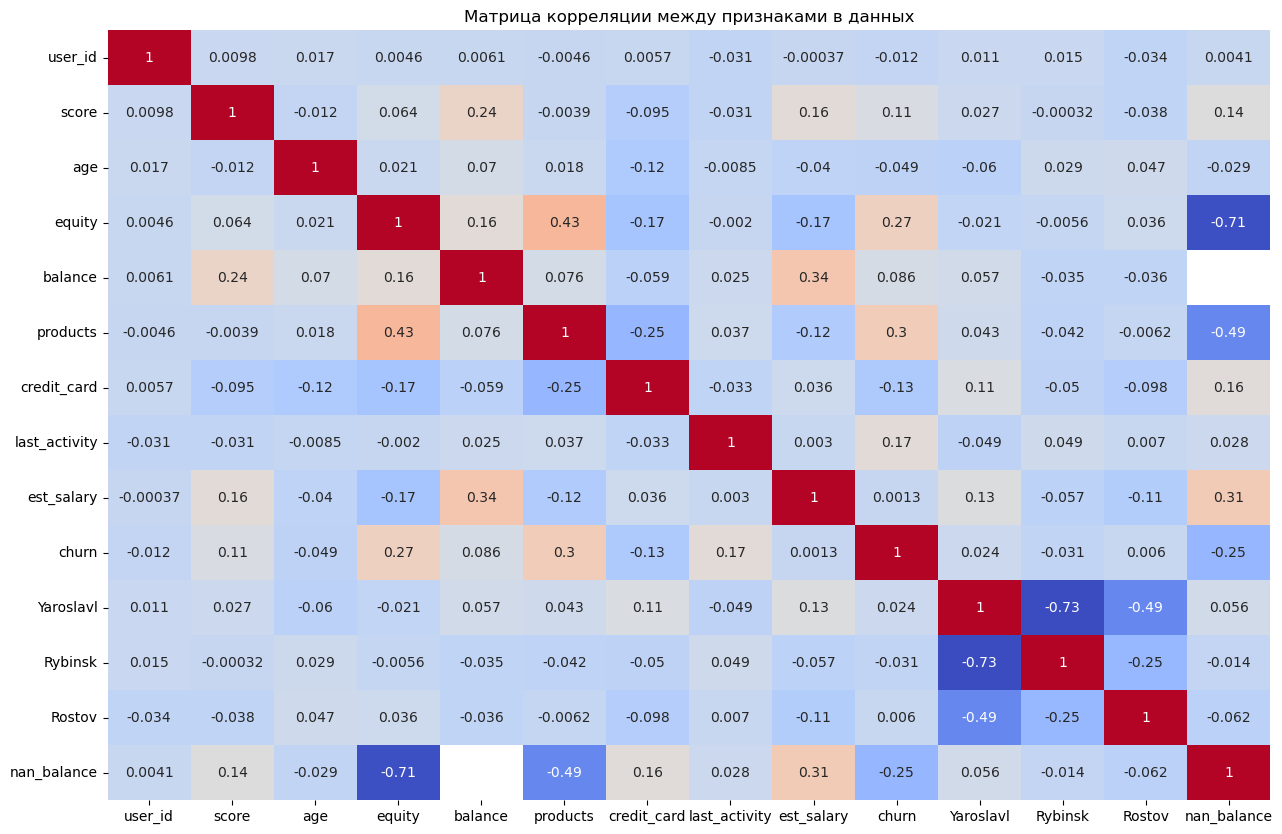

In [29]:
#Вновь построим матрицу корреляции, на этот раз полную
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), 
                annot=True, cmap='coolwarm', cbar=False)
plt.title('Матрица корреляции между признаками в данных')
plt.show()

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Пожалуйста, опиши все зависимости между оттоком и другими признаками по шкале Чеддока (принимая во внимание корреляции по модулю равные или более 10%).
</div>

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;📝<br>
В презентации будет хорошо смотреться heatmap в один столбец (churn) из этой корреляционной матрицы, отсортированный по величине корреляции, но без самой строки (churn). Её можно убрать методом drop
</div>


<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
   Анализ с учетом шкалы Чеддока добавлен ниже
</div>

Анализ корреляции с оттоком по шкале Чеддока:

equity - 0.26  слабая корреляция по шкале Чеддока. Наблюдается слабая линейная зависимость от оценки активов клиента. Более высокая оценка соответствует более высоким шансам оттока.

products - 0.3 умеренная корреляция по шкале Чеддока. Чем больше продуктов использует клиент, тем больше шанс оттока. Это самая сильная прямая связь из рассматриваемых.

last_activity - 0.16 слабая корреляция по шкале Чеддока. Активность клиентов коррелирует с показателем отточности. Более активные клиенты уходят чаще.

---

credit-card - -0.13 слабая обратная корреляция по шкале Чеддока . Держатели кредитных карт, как и в целом пользователи всех кредитных продуктов, как правило более лояльные. Потому что отсутствие ляольности для них сопряжено с определенными последствиями.

nan-balance - -0.25  слабая обратная корреляция по шкале Чеддока. У отточных клиентов ниже вероятность того, что баланс не указан.

<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>✔️</big></b></div>

In [30]:
df['score'].describe()

count   10000.00
mean      848.70
std        65.45
min       642.00
25%       802.00
50%       853.00
75%       900.00
max      1000.00
Name: score, dtype: float64

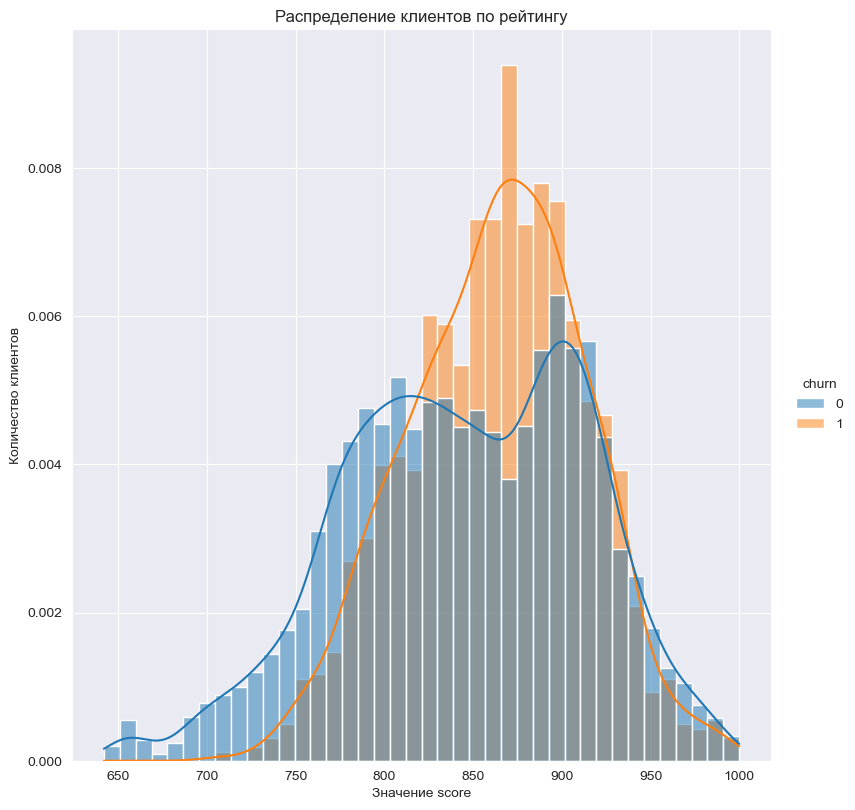

In [31]:
sns.set_style("darkgrid")
sns.displot(df,x='score',hue='churn', height=8, kde = True,  stat='density', common_norm=False)
plt.title('Распределение клиентов по рейтингу')
plt.xlabel('Значение score')
plt.ylabel('Количество клиентов')
plt.show()

Интеравалы с преобладанием отточных: 830 - 930 score

Интеравалы с преобладанием лояльных: 0 - 825 score, 925+ score

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Пожалуйста, чтобы точно сделать корректные выводы, примени следующие параметры тут и в аналогичных графиках ниже:
    
    kde=True, stat='density', common_norm=False

Когда мы выделяем отточные сегменты, мы выделяем как отточных, так и не отточных клиентов по каким-то признакам. Поэтому более отточные интервалы мы не можем определить просто по анализу распределения отточных. Мы не должны игнорировать распределение неотточных, однако, так как датасет несбалансированный, сделать какие-то выводы по ненормированным графикам действительно сложно.
    
Нас интересуют участки характеристик, на которых уровень оттока превышает средний по банку. Делать группировку по характеристикам с большим количеством уникальных значений (баланс, зарплата) сложно, но мы можем сделать этот вывод и по нормализованным гистограммам или kde-графикам. Уровень оттока приблизительно будет превышать средний по банку там, где плотность распределения отточных клиентов будет выше плотности распределения неотточных (можно сказать, что нормированная гистограмма показывает нам, как выглядели бы распределения отточных и неотточных, если бы их в датасете было равное количество).
    
По возрасту есть линейный график с уровнями оттока, он понятен не специалистам и подойдёт для презентации.
</div>

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Параметры добавлены в графики, также добавлены описания интервалов с преобладанием оттончных и неотточных клиентов
</div>

<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>👍</big></b></div>

In [32]:
df['age'].describe()

count   10000.00
mean       42.72
std        12.17
min        18.00
25%        33.00
50%        40.00
75%        51.00
max        86.00
Name: age, dtype: float64

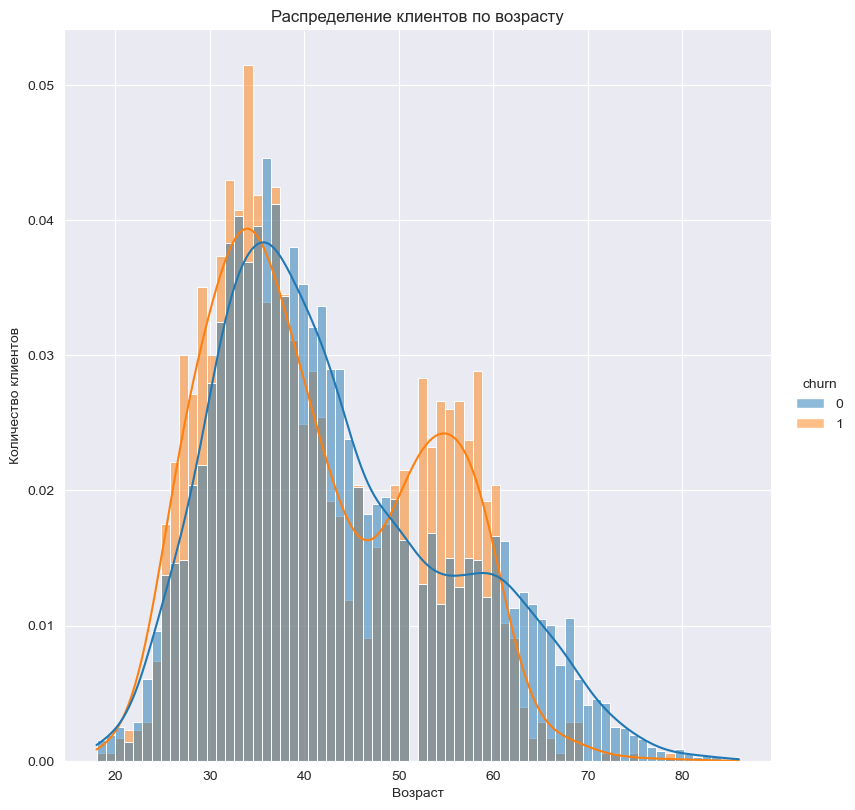

In [33]:
sns.displot(df,x='age',hue='churn', bins = 70,  height=8, kde = True,  stat='density', common_norm=False)
plt.title('Распределение клиентов по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()

Интеравалы с преобладанием отточных: 25-35, 50-60

Интеравалы с преобладанием лояльных: 18-25, 35-50, 60 +

<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>👍</big></b></div>

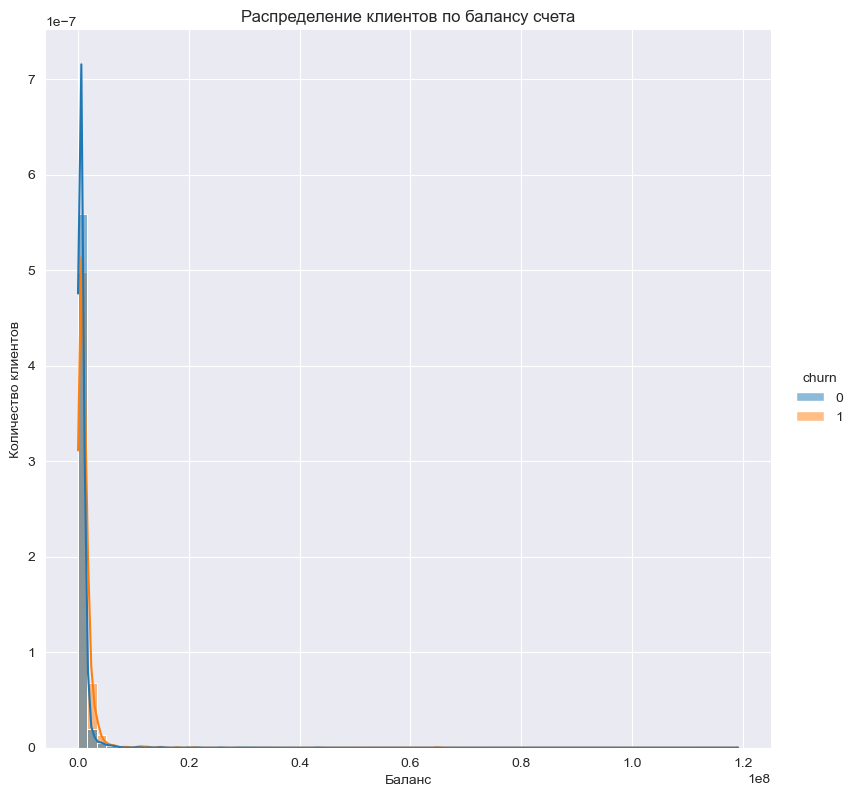

In [34]:
sns.displot(df,x='balance',hue='churn', bins = 70,  height=8, kde = True,  stat='density', common_norm=False)
plt.title('Распределение клиентов по балансу счета')
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов')
plt.show()

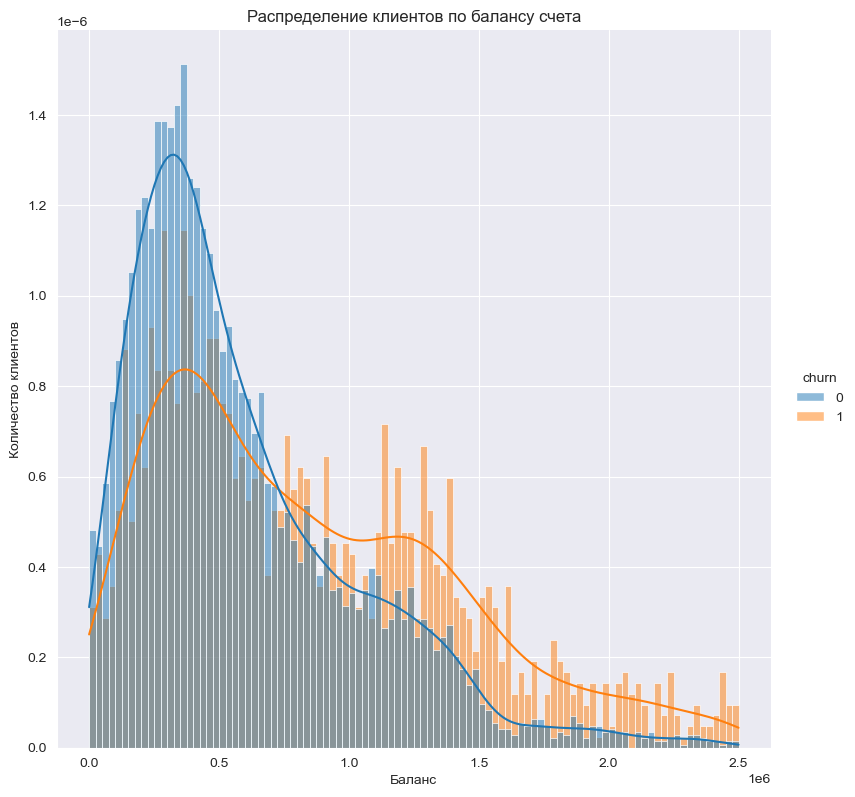

In [35]:
sns.displot(df[df['balance'] < 2500000],x='balance',hue='churn', bins = 100, height=8, kde = True,  stat='density', common_norm=False)
plt.title('Распределение клиентов по балансу счета')
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов')
plt.show()

Интеравалы с преобладанием отточных: баланс выше 750 тысяч рублей

Интеравалы с преобладанием лояльных: баланс ниже 750 тысяч рублей

<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>👍</big></b></div>

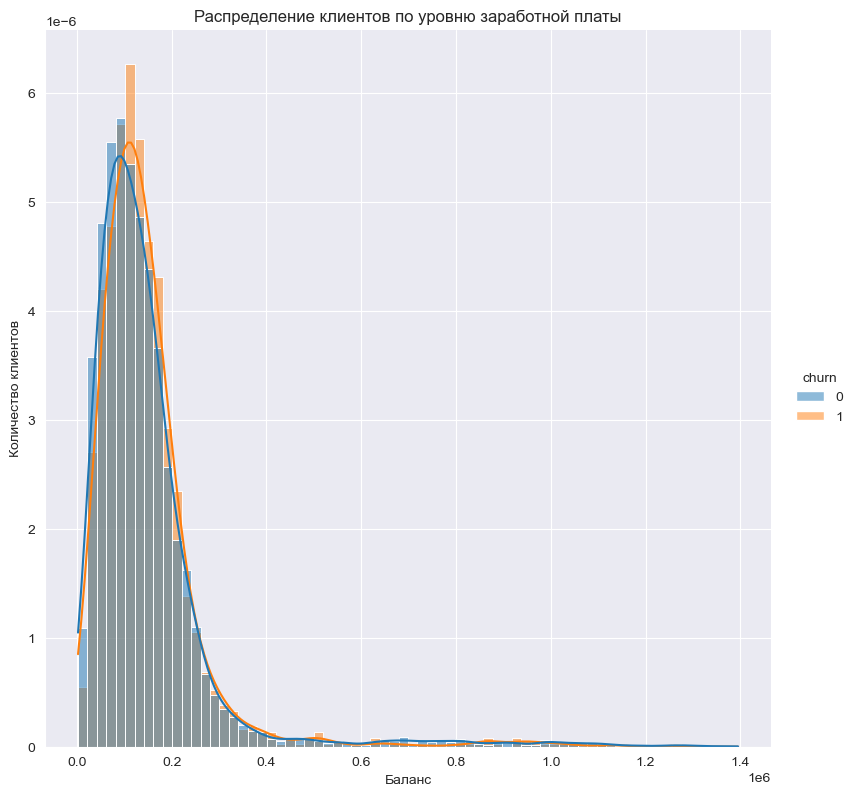

In [36]:
sns.displot(df,x='est_salary',hue='churn', bins = 70,  height=8, kde = True,  stat='density', common_norm=False)
plt.title('Распределение клиентов по уровню заработной платы')
plt.xlabel('Баланс')
plt.ylabel('Количество клиентов')
plt.show()

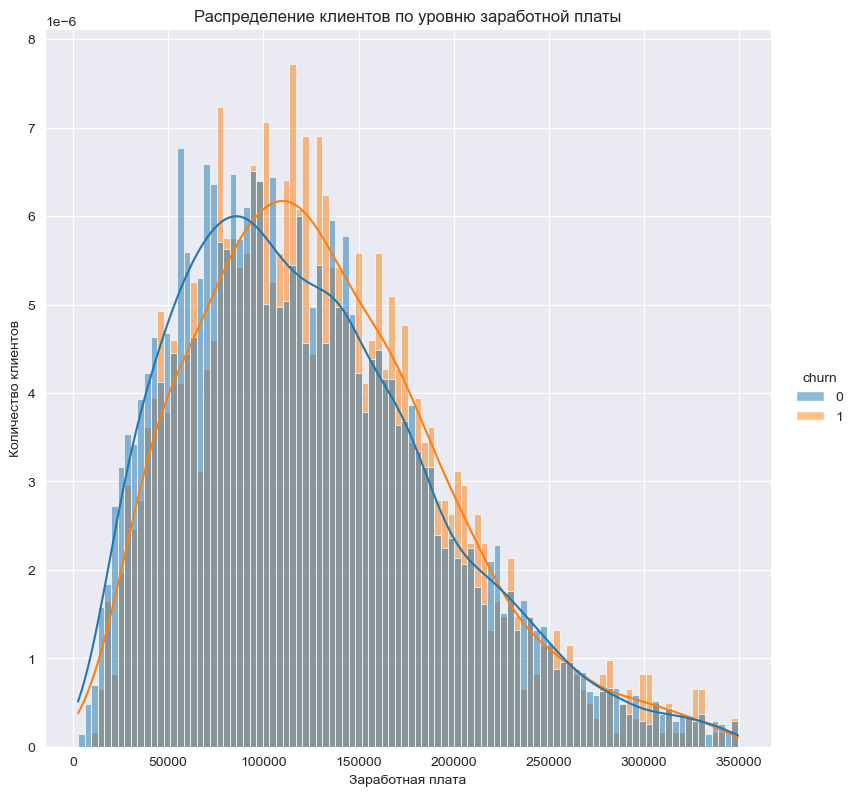

In [37]:
sns.displot(df[df['est_salary'] < 350000],x='est_salary',hue='churn', bins = 100,  height=8, kde = True, stat='density', common_norm=False)
plt.title('Распределение клиентов по уровню заработной платы')
plt.xlabel('Заработная плата')
plt.ylabel('Количество клиентов')
plt.show()

Интеравалы с преобладанием отточных: зарплата 100000 - 200000

Интеравалы с преобладанием лояльных: зарплата до 100000 рублей

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
По всем характеристикам выше надо будет указать, какие интервалы связаны с более лояльными, не отточными клиентами (менее отточные по сравнению со средним уровнем оттока).
</div>

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Добавлено
</div>

<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>👍</big></b></div>

А это точно Ярославская область?

<div class="alert alert-success"><b>Комментарий ревьюера 2</b>&nbsp;📝<br>
Данные сгенерированы, обычно в реальных данных гораздо больше всяких неувязок и ошибок.
</div>

In [38]:
df['est_salary'].describe()

count     10000.00
mean     147866.89
std      139388.51
min        2546.30
25%       75251.90
50%      119658.10
75%      174500.54
max     1395064.45
Name: est_salary, dtype: float64

Оценка зарплат клиентов банка явно превышают среднее значение заработной платы по региону. Необходимо учитывать это при предоставлении рекомендации отделу маркетинга.
Средняя зарплата в Ярославской области по данным сайта <https://bdex.ru/yaroslavskaya-oblast/> составляет 41440 рублей.

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Для указаных ниже категориальных характеристик надо построить столбчатые диаграммы с уровнями оттока (количество отточных в категории, делённое на общее количество в категории), как это сделано по городам ниже. 
</div>

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Сделано для остальных параметров
</div>

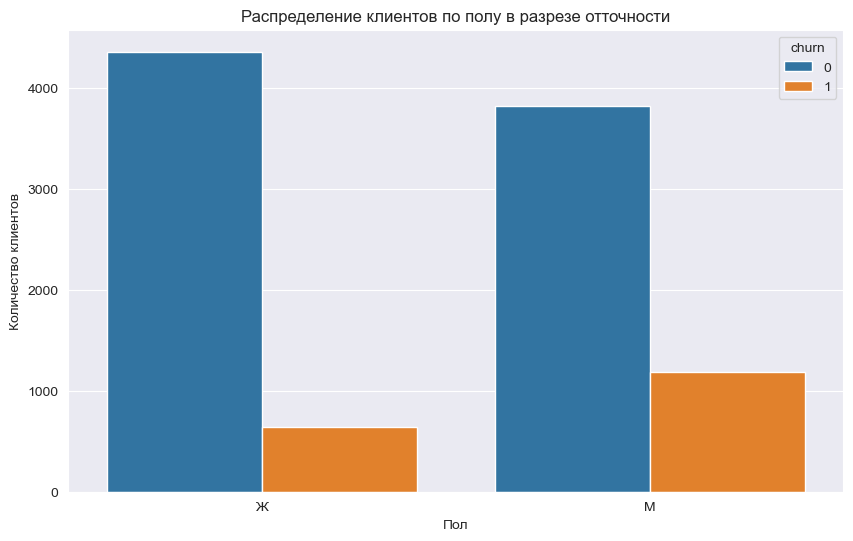

In [39]:
plt.figure(figsize=(10, 6))
sns.countplot(df['gender'],hue=df['churn'])
plt.title('Распределение клиентов по полу в разрезе отточности')
plt.xlabel('Пол')
plt.ylabel('Количество клиентов')
plt.show()

Лояльность женщин заметно выше, чем лояльность мужчин. Мы еще вернемся к более подробному анализу различий в поведении полов, а пока построим графики для оставшихся признаков.

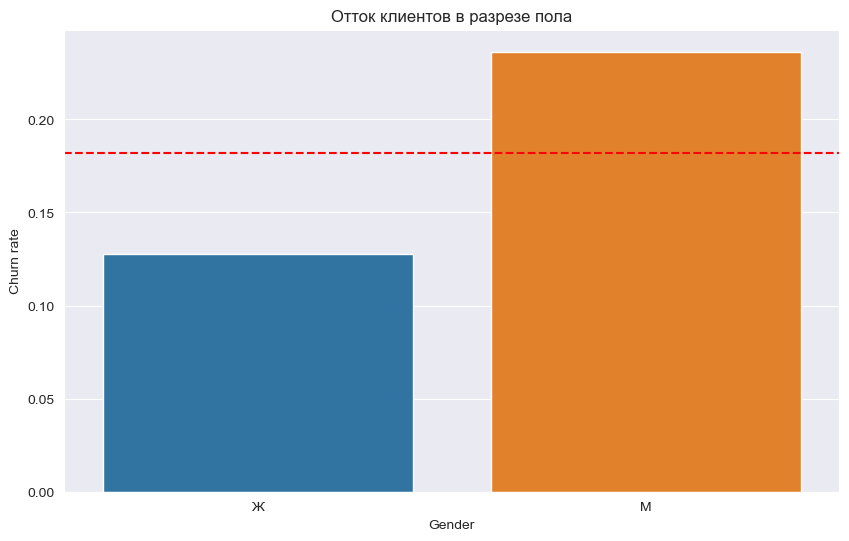

In [40]:
churn_rate_gender = df.groupby('gender')['churn'].mean().reset_index()
mean_churn_rate = df['churn'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x='gender', y='churn', data=churn_rate_gender)
plt.axhline(y=mean_churn_rate, color='r', linestyle='--', label='Средний уровень оттока по банку')
plt.title('Отток клиентов в разрезе пола')
plt.xlabel('Gender')
plt.ylabel('Churn rate')
plt.show()

<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>👍</big></b></div>

Отточность мужчин выше

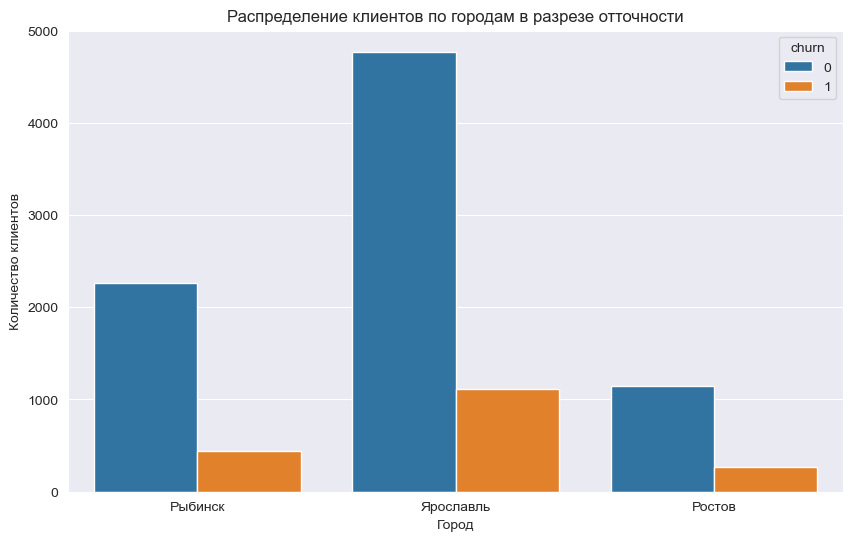

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(df['city'],hue=df['churn'])
plt.title('Распределение клиентов по городам в разрезе отточности')
plt.xlabel('Город')
plt.ylabel('Количество клиентов')
plt.show()

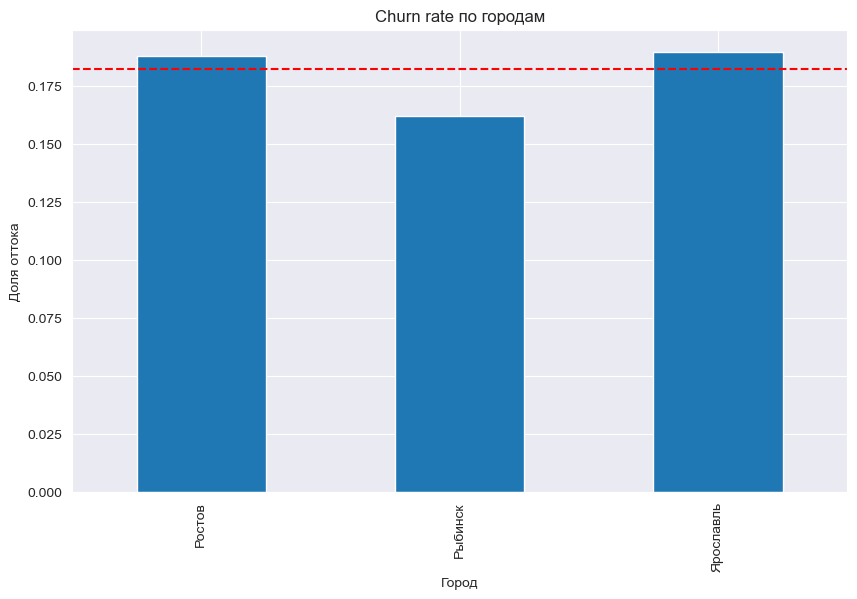

In [42]:
plt.figure(figsize=(10, 6))
city_churn = df.groupby('city')['churn'].mean()
city_churn.plot(kind='bar')

plt.title('Churn rate по городам')
plt.xlabel('Город')
plt.ylabel('Доля оттока')
plt.axhline(y=mean_churn_rate, color='r', linestyle='--', label='Средний уровень оттока по банку')
plt.show()

<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>👍</big></b></div>

Рыбинск немного выделяется на общем фоне, однако можно с уверенностью сказать, что уровни оттока клиентов в разных городах примерно равны и географический фактор не является ключевым для определения лояльности клиента

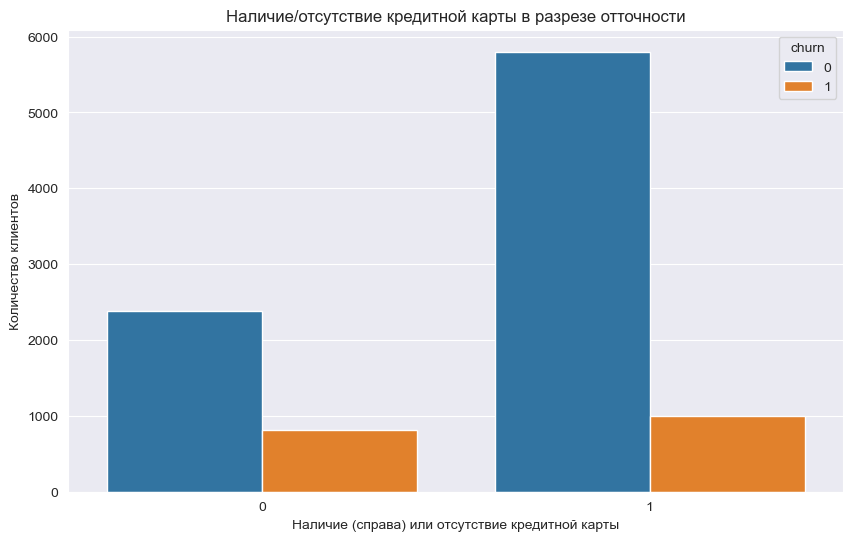

In [43]:
plt.figure(figsize=(10, 6))
sns.countplot(df['credit_card'],hue=df['churn'])
plt.title('Наличие/отсутствие кредитной карты в разрезе отточности')
plt.xlabel('Наличие (справа) или отсутствие кредитной карты')
plt.ylabel('Количество клиентов')
plt.show()

Пользователи кредитных продуктов в среднем более лояльны, чем другие пользователи. Это подтверждают также многие другие исследования банковской сферы.

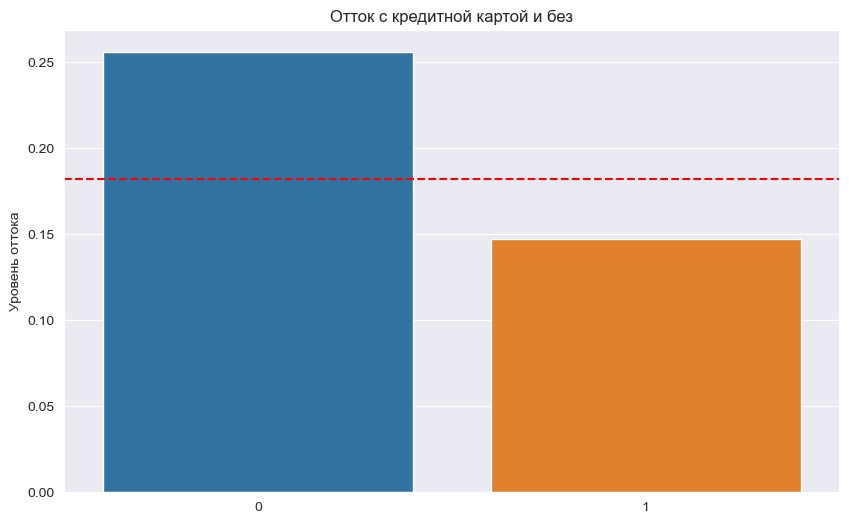

In [44]:
churn_rate_card = df.groupby('credit_card')['churn'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='credit_card', y='churn', data=churn_rate_card)
plt.title('Отток с кредитной картой и без')
plt.xlabel('')
plt.ylabel('Уровень оттока')
plt.axhline(y=mean_churn_rate, color='r', linestyle='--', label='Средний уровень оттока по банку')
plt.show()

Уровень оттока у клиентов без кредитной карты почти в два раза выше

<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>👍</big></b></div>

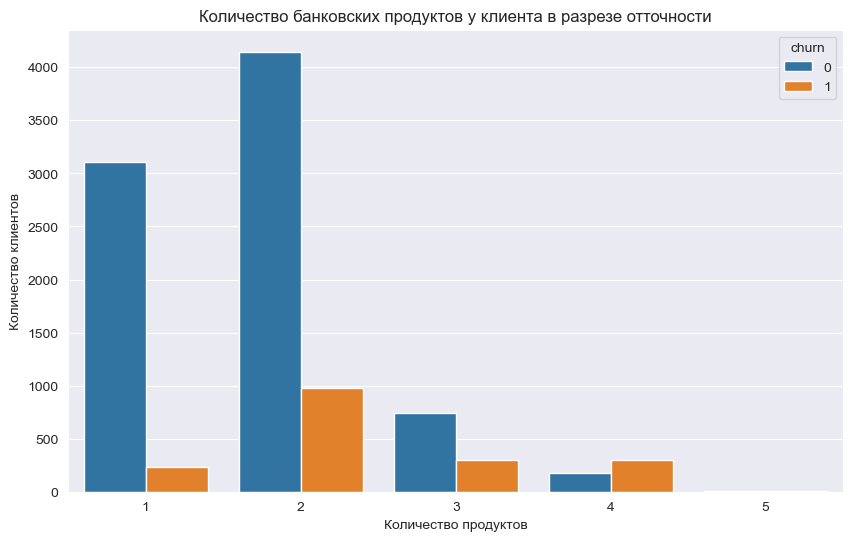

In [45]:
plt.figure(figsize=(10, 6))
sns.countplot(df['products'],hue=df['churn'])
plt.title('Количество банковских продуктов у клиента в разрезе отточности')
plt.xlabel('Количество продуктов')
plt.ylabel('Количество клиентов')
plt.show()

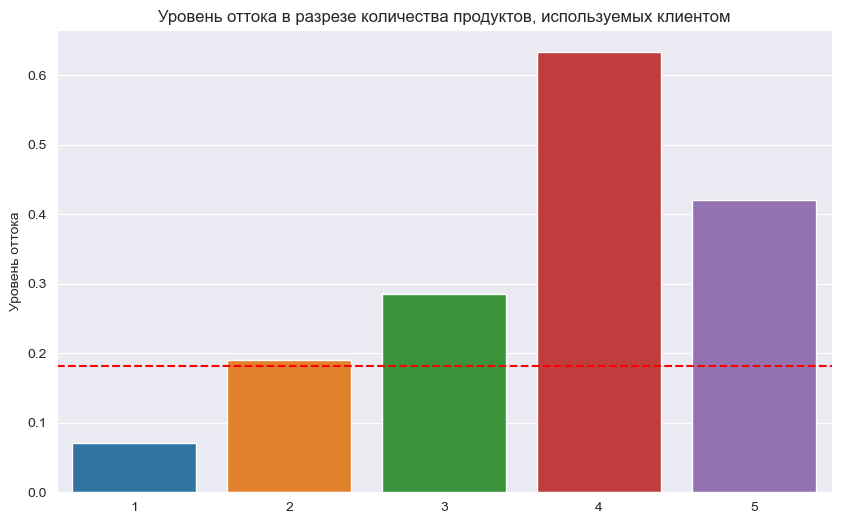

In [46]:
churn_rate_products = df.groupby('products')['churn'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='products', y='churn', data=churn_rate_products)
plt.title('Уровень оттока в разрезе количества продуктов, используемых клиентом')
plt.xlabel('')
plt.ylabel('Уровень оттока')
plt.axhline(y=mean_churn_rate, color='r', linestyle='--', label='Средний уровень оттока по банку')
plt.show()

Чем больше продуктов, тем выше отток.

<div class="alert alert-danger"><b>Комментарий ревьюера 2</b>&nbsp;🔧 <br>
Начиная с какого числа продуктов отток клиентов выше среднебанковского?
</div>

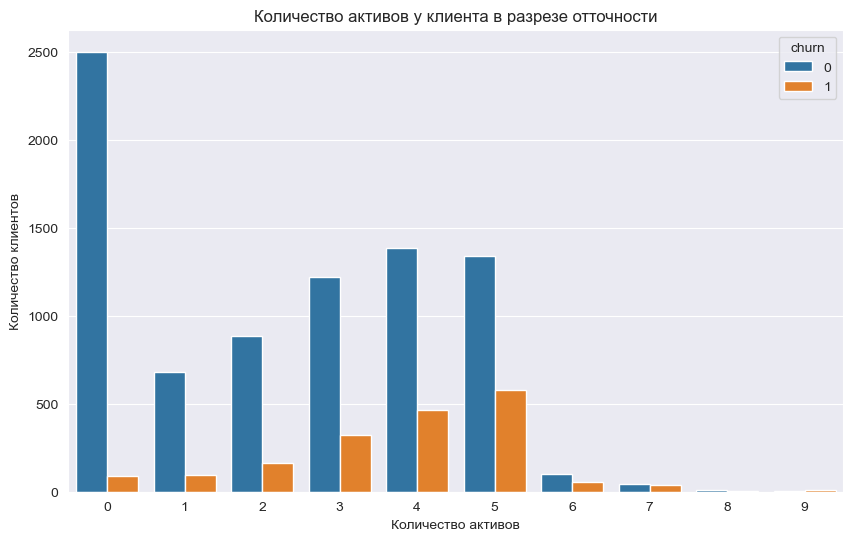

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(df['equity'],hue=df['churn'])
plt.title('Количество активов у клиента в разрезе отточности')
plt.xlabel('Количество активов')
plt.ylabel('Количество клиентов')
plt.show()

Чем больше у клиента активы, тем более капризным он является. Вероятно, он сравнивает процентные ставки в разных банках и всегда готов уйти туда, где условия выгоднее.

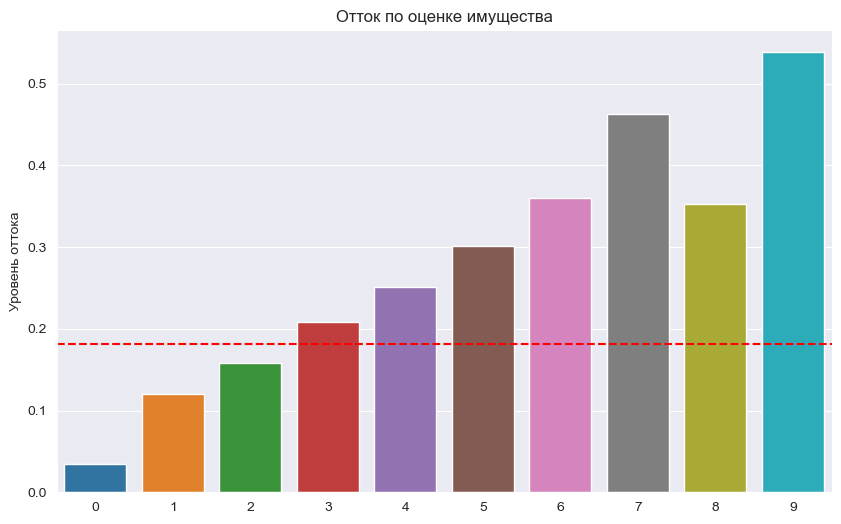

In [48]:
churn_rate_equity = df.groupby('equity')['churn'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='equity', y='churn', data=churn_rate_equity)
plt.title('Отток по оценке имущества')
plt.xlabel('')
plt.ylabel('Уровень оттока')
plt.axhline(y=mean_churn_rate, color='r', linestyle='--', label='Средний уровень оттока по банку')
plt.show()

Отток растет с ростом количества активов

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Пожалуйста, по категориальным переменным (графики выше) посчитай при помощи groupby или pivot_table уровень оттока и отобрази его на столбиковых диаграммах. Также при помощи plt.axvline или plt.axhline отобрази на этих графиках средний уровень оттока по банку.
</div>

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  столбчатые диаграммы построены. plt.axhline добавлено
</div>

<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>✔️</big></b></div>

### Анализ факторов, влияющих на отток и лояльность клиентов

Рассмотрим "сырую" корреляцию признаков с параметром оттока. Затем рассмотрим их подробнее и построим дополнительные графики.

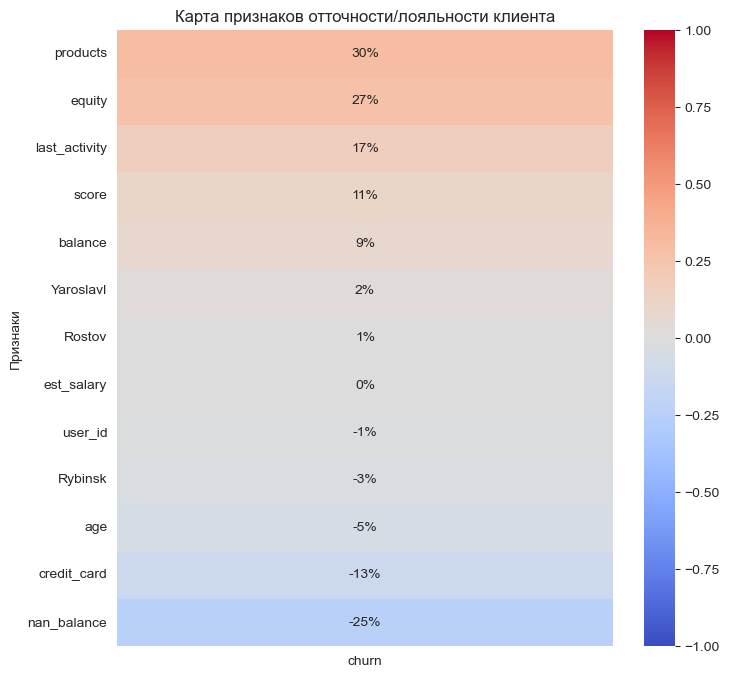

In [49]:
df_corr = df.corr().drop('churn').sort_values('churn', ascending=False)

plt.figure(figsize=(8, 8))
sns.heatmap(df_corr[['churn']], annot = True, fmt='.0%', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.title('Карта признаков отточности/лояльности клиента')
plt.ylabel('Признаки')
plt.show()

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Надо это вставить в презентацию</div>

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  график добавлен в презентацию
</div>

Если посмотреть на все доступные для анализа признаки, то практически у всех линейная зависимость уровня оттока к увеличению/уменьшению того или иного параметра. Среди исключений - возраст. Здесь мы видим два основных пика оттока клиентов. Для того, чтобы изучить подробнее возраст клиентов, разделим клиентов на группы по возрасту с шагом в 5 лет.

In [50]:
bins = [0, 30, 35, 40, 45, 50, 55, 60, float('inf')]
labels = ['до 30 лет', '30-35 лет', '35-40 лет', '40-45 лет', '45-50 лет', '50-55 лет', '55-60 лет','старше 60 лет']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
df['age_group'].value_counts()

30-35 лет        1868
35-40 лет        1831
до 30 лет        1423
40-45 лет        1354
старше 60 лет    1033
45-50 лет         913
50-55 лет         801
55-60 лет         777
Name: age_group, dtype: int64

In [51]:
feminin = df[df['gender'] == 'Ж']
masculin = df[df['gender'] == 'М']

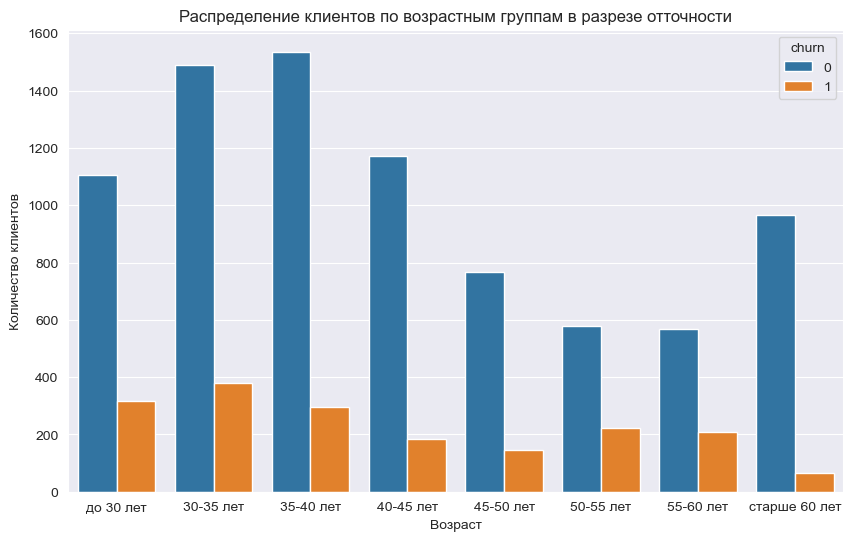

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(df['age_group'],hue=df['churn'])
plt.title('Распределение клиентов по возрастным группам в разрезе отточности')
plt.xlabel('Возраст')
plt.ylabel('Количество клиентов')
plt.show()

Построим тот же самый график только в разрезе пола клиента.

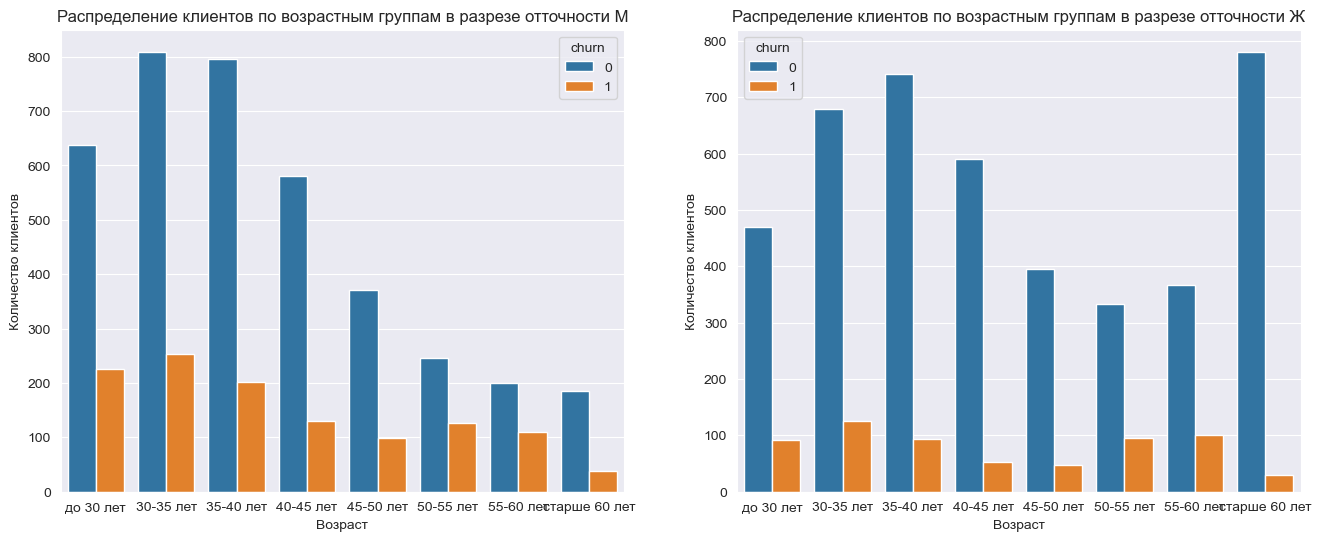

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.countplot(masculin['age_group'], hue=masculin['churn'], ax=ax1)
ax1.set_title('Распределение клиентов по возрастным группам в разрезе отточности М')
ax1.set_xlabel('Возраст')
ax1.set_ylabel('Количество клиентов')

sns.countplot(feminin['age_group'], hue=feminin['churn'], ax=ax2)
ax2.set_title('Распределение клиентов по возрастным группам в разрезе отточности Ж')
ax2.set_xlabel('Возраст')
ax2.set_ylabel('Количество клиентов')

plt.show()

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;💡<br>
У нас тут категорию до 25 лет также может быть нужно выделить. 
</div>

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  да, согласен, что группа 20-25 отличается от группы 25-30, но выделение этой группы отдельно разбило бы группу "до 30" на слишком маленьникие части, поэтому оставляю как есть. разница между поведением пользователей есть но она не критическая, например ее нельзя сравнить с поведением пользователей до и после выхода на пенсию
</div>

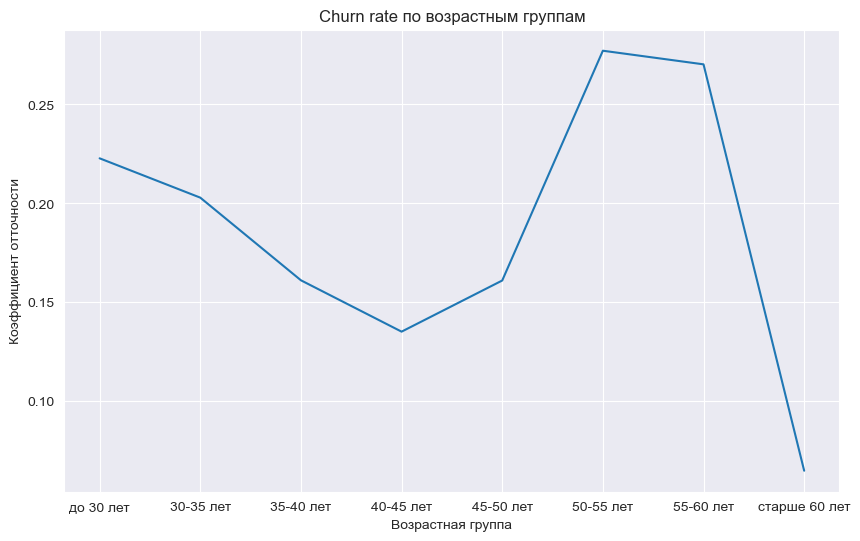

In [54]:
churn_by_age = df.groupby('age_group')['churn'].mean().reset_index()
masculin_churn_by_age = masculin.groupby('age_group')['churn'].mean().reset_index()
feminin_churn_by_age = feminin.groupby('age_group')['churn'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='age_group', y='churn', data=churn_by_age)
plt.title('Churn rate по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Коэффициент отточности')
plt.show()

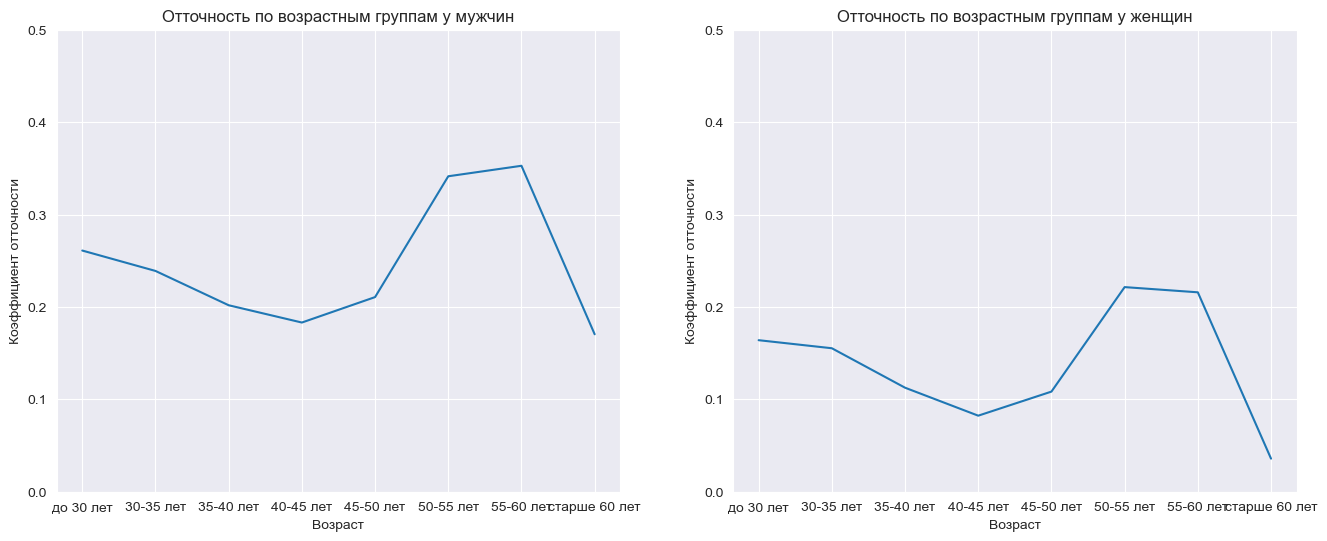

In [55]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

sns.lineplot(x='age_group', y='churn', data=masculin_churn_by_age, ax=ax1)
ax1.set_title('Отточность по возрастным группам у мужчин')
ax1.set_xlabel('Возраст')
ax1.set_ylabel('Коэффициент отточности')
ax1.set_ylim(0, 0.5)

sns.lineplot(x='age_group', y='churn', data=feminin_churn_by_age, ax=ax2)
ax2.set_title('Отточность по возрастным группам у женщин')
ax2.set_xlabel('Возраст')
ax2.set_ylabel('Коэффициент отточности')
ax2.set_ylim(0, 0.5)

plt.show()

Женщины заметно лояльнее, чем мужчины по всем возрастным группам. Динамика лояльности по возрасту у обоих полов идентична.

Мы видим, что самыми лояльными группами являются клиенты от 35 до 50 лет и люди старше 60.

<div class="alert alert-success"><b>Комментарий ревьюера&nbsp;<big>👍</big></b>выводы верные</div>

Однако, здесь мы должны учитывать следующий факт - показатель churn по условию задачи проставили клиенты банка, прошедшиие опрос в приложении. Мы также видим позитивную корреляцию между активностью в приложении и высоким churn rate. Мы можем оставить предыдущий вывод в силе, однако с несколькими оговоркам.

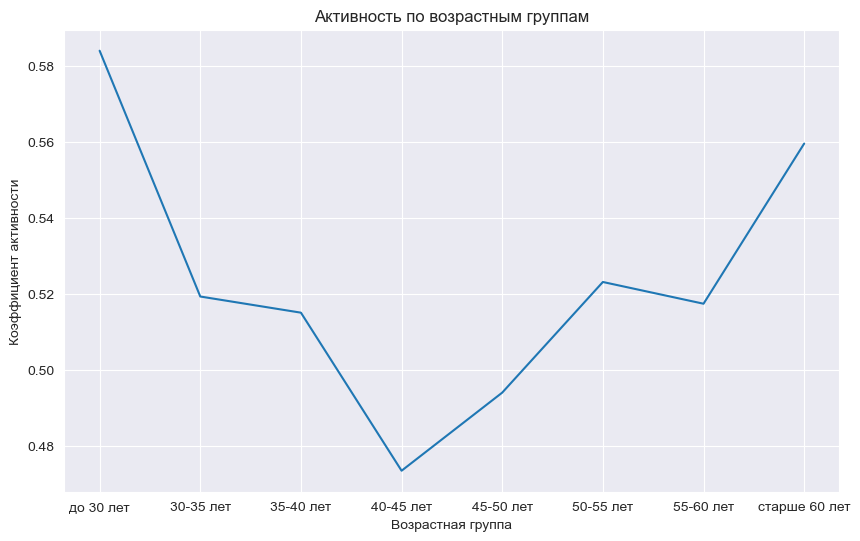

In [56]:
age_activity = df.groupby('age_group')['last_activity'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='age_group', y='last_activity', data=age_activity)
plt.title('Активность по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Коэффициент активности')
plt.show()

Видим очень странную картину - самые активные - это молодежь и пенсионеры.

У людей среднего возраста активность сильно проседает. Это также коррелирует с показателем churn, который тоже низкий у этой группы. А вот люди предпенсионного возраста начинают активнее распоряжаться своими деньгами.

In [57]:
no_churn=df.query('churn==0')
churn =df.query('churn==1')

display(no_churn['last_activity'].mean(), 
        churn['last_activity'].mean())

0.4837408312958435

0.7021978021978021

Видим, что активность заметно выше у тех, кто планирует уход из банка. Вероятно, это связано с использованием приложения, ведь именно оттуда мы получаем информацию о потенциальном уходе клиента. Те, кто не пользуется приложением, попросту не доносят до нас эту информацию.

Теперь построим графики распредения баланса.

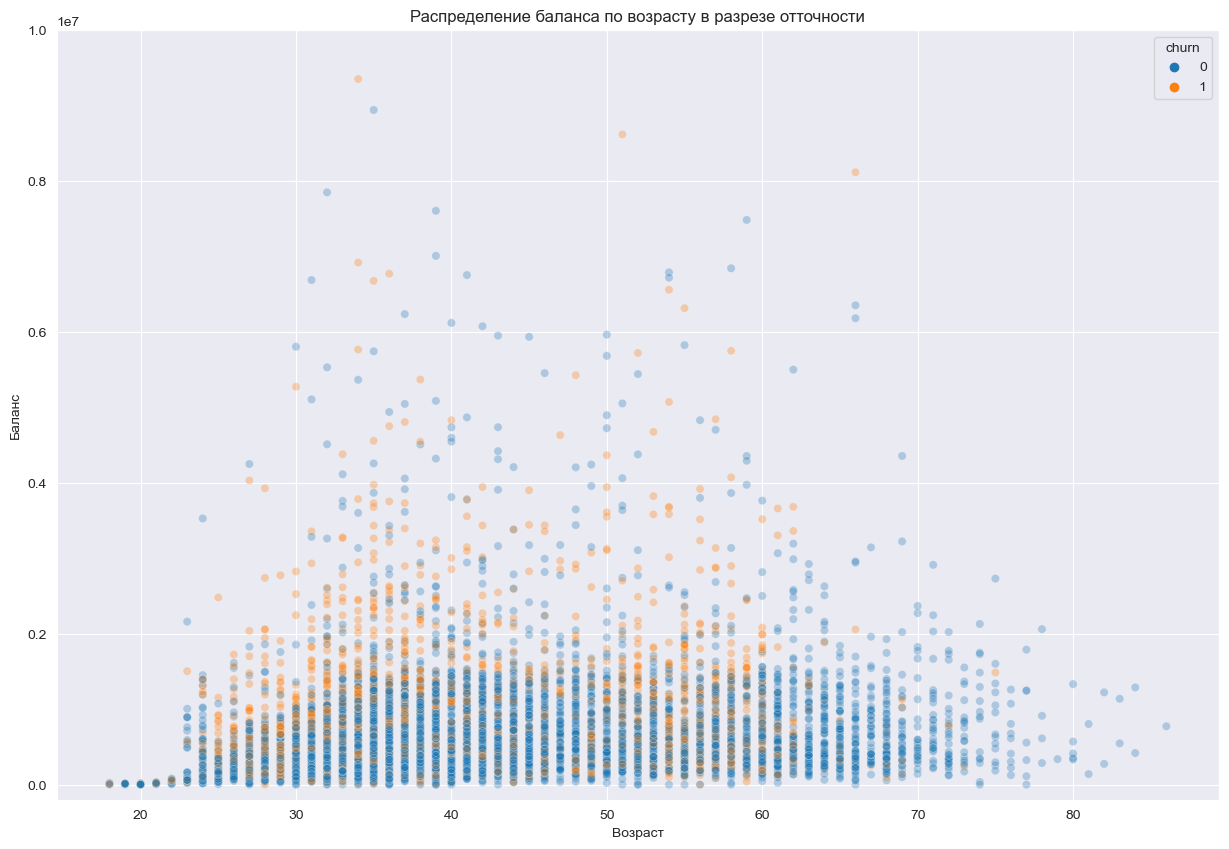

In [58]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='age', y='balance', data=df, hue='churn', alpha = 0.3)
plt.title('Распределение баланса по возрасту в разрезе отточности')
plt.xlabel('Возраст')
plt.ylim(-200000, 10000000)
plt.ylabel('Баланс')
plt.show()

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Если на графике точки сливаются в одну область, то можно применять разные методы:
    
* ✔️ установление полупрозрачности (alpha), 
* уменьшение размера точек, 
* <s>применение логарифмического масштаба, если почти все точки собрались в одной области графика,</s>
* 🔧 если точки выстраиваются в линии вокруг целых значений, то поможет внесение шума в данные (см. np.random и <a href='https://seaborn.pydata.org/generated/seaborn.stripplot.html'>stripplot</a>).
* если ничего не помогает и чёткости не появляется, значит стоит попробовать построить 2D гистограмму, например seaborn.histplot, также вариантом такого графика является <a href='https://seaborn.pydata.org/examples/hexbin_marginals.html'>hexbin</a>
</div>

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;⚠️<br>
Лучше применять heatmap с уровнями оттока, такие графики в основном годятся для определения выбросов.
</div>

На графике заметно два желтых пятна - высокий баланс в 30-35 лет и высокие доходы и 50-60 лет. Банку явно нужно работать над лояльностью клиентов. Ведь самые ценные группы клиентов является наиболее проблематичными.

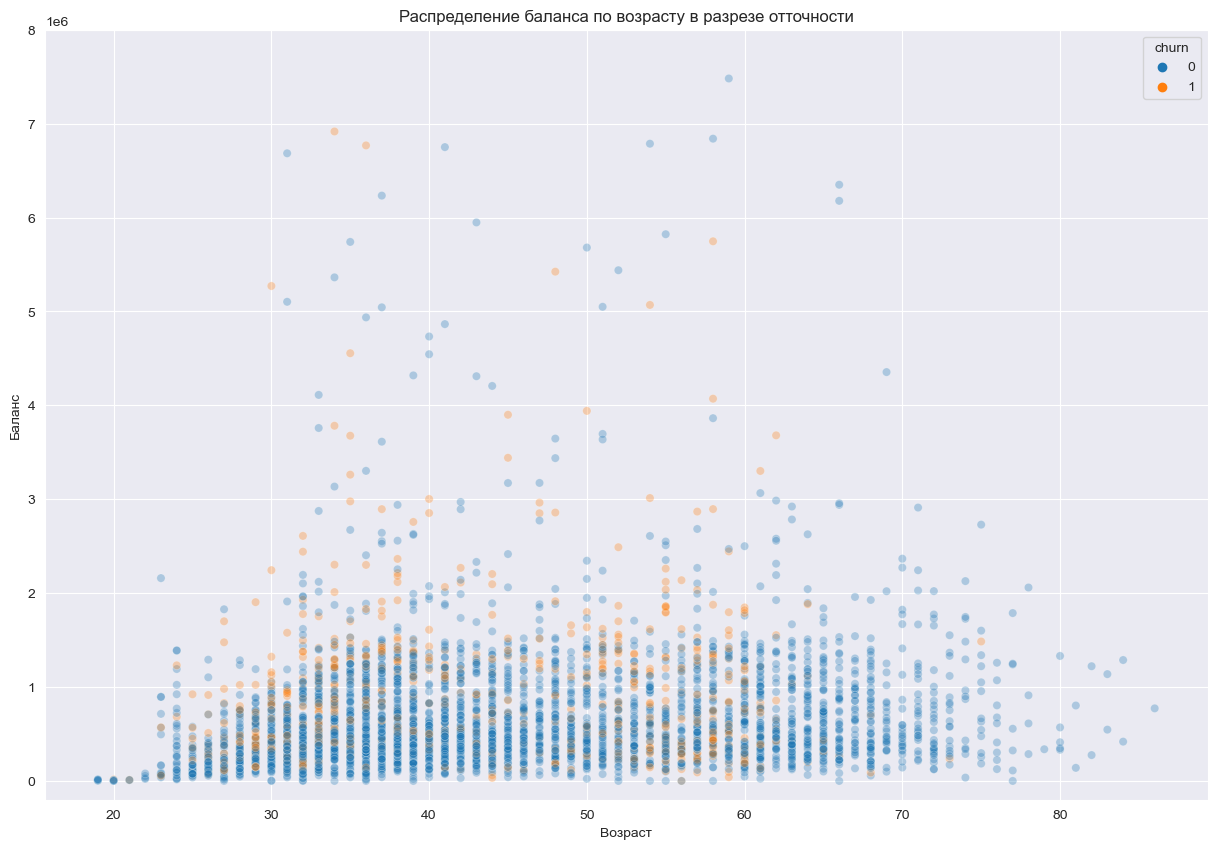

In [59]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='age', y='balance', data=feminin, hue='churn', alpha = 0.3)
plt.title('Распределение баланса по возрасту в разрезе отточности')
plt.xlabel('Возраст')
plt.ylim(-200000, 8000000)
plt.ylabel('Баланс')
plt.show()

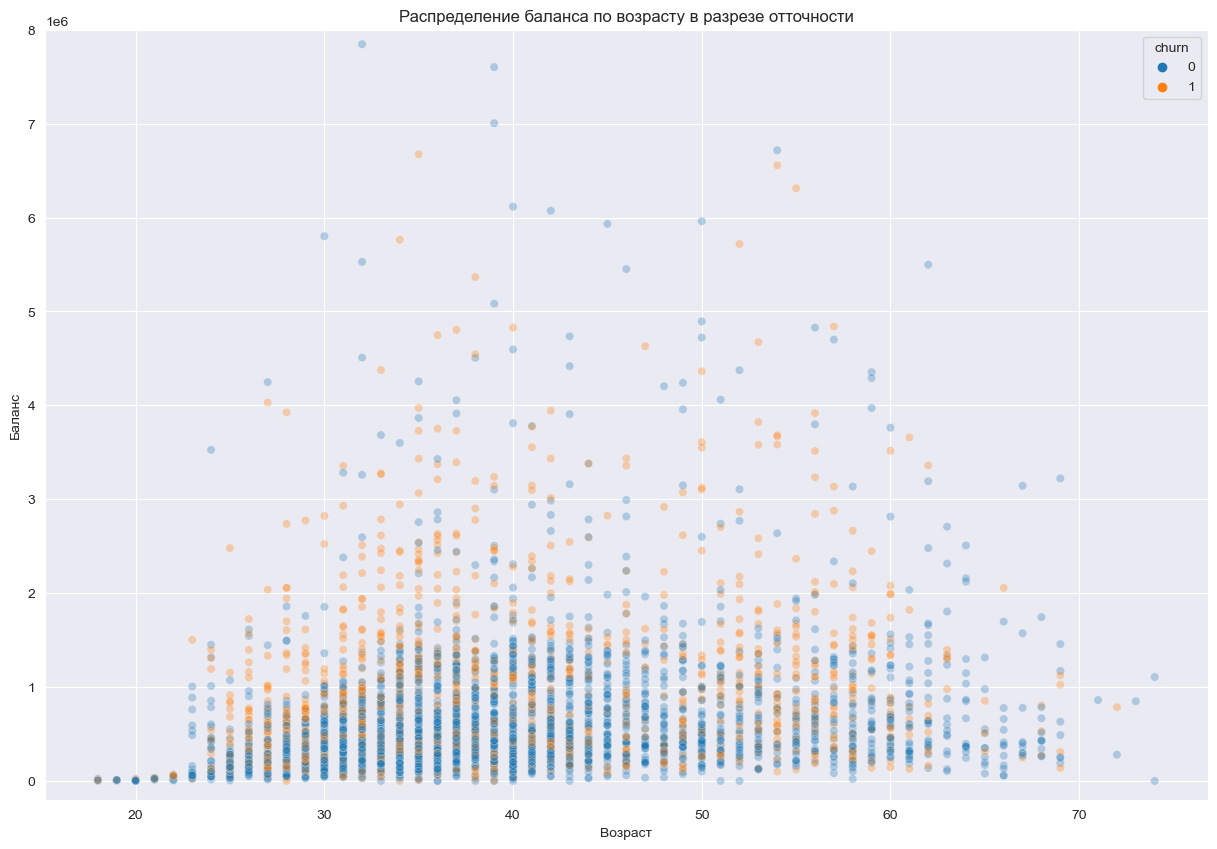

In [60]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='age', y='balance', data=masculin, hue='churn', alpha = 0.3)
plt.title('Распределение баланса по возрасту в разрезе отточности')
plt.xlabel('Возраст')
plt.ylim(-200000, 8000000)
plt.ylabel('Баланс')
plt.show()

Картина в целом та же, но у женщин ожидаемо больше синего, а у мужчин - больше желтого.

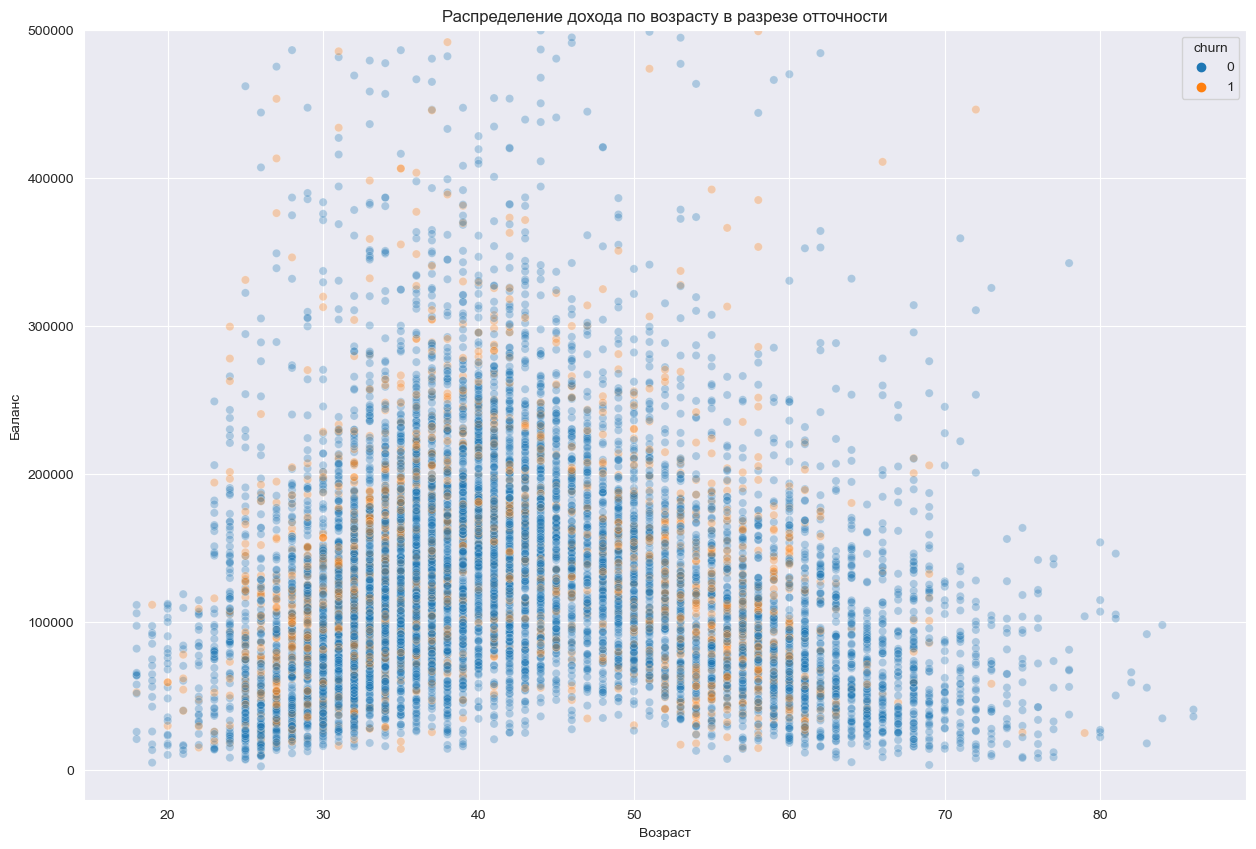

In [61]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='age', y='est_salary', data=df, hue='churn', alpha = 0.3)
plt.title('Распределение дохода по возрасту в разрезе отточности')
plt.xlabel('Возраст')
plt.ylim(-20000, 500000)
plt.ylabel('Баланс')
plt.show()

На данном графике мы вновь убеждаем что ключевым параметром является возраст клиента. В группе риска 30-35 лет самыми отточными являются клиенты с большим доходом. Тогда как в группе 50-60 лет отточность практически не коррелирует с уровнем дохода.

**Промежуточный вывод** Исходя из исследования ключевых показателей в разрезе параметра churn удалось выяснить следующие вещи:

Несмотря на то, что в матрице корреляции возраст никак не выделяется на фоне других парметров, именно этот показатель играет ключевую роль в поведении клиентов.

Можно на данный момент выделить несколько групп самых лояльных клиентов - во-первых, люди старше 60 (пенсионеры), во-вторых - женщины, за исключением предпенсионного возраста, в-третьих пользователи кредитных продуктов.

Под угрозой находятся самые ценные группы пользователей. Мужчины 30-35 лет и 45-60 лет с наибольшими сбережениями вызывают особенные опасения.

## Проверка статистических гипотез

### Гипотеза о различии дохода

Проверим гипотезу о различии дохода, между теми клиентами, кто ушел и теми, кто остался.

In [62]:
sample_0=df.query('churn==0')
sample_1=df.query('churn==1')

In [63]:
#Сравним значения дисперсии
display(sample_0['est_salary'].var(), 
        sample_1['est_salary'].var(),
        sample_0['est_salary'].var()/sample_1['est_salary'].var())

20392519451.455868

15107976364.85091

1.3497849717914294

Отношение дисперсий двух выборок составляет 1.35. Будем считать, что дисперсии сопоставимы для проведения t-test. Значение equal_var поставим False, так как дисперсии сопоставимы, но не равны.

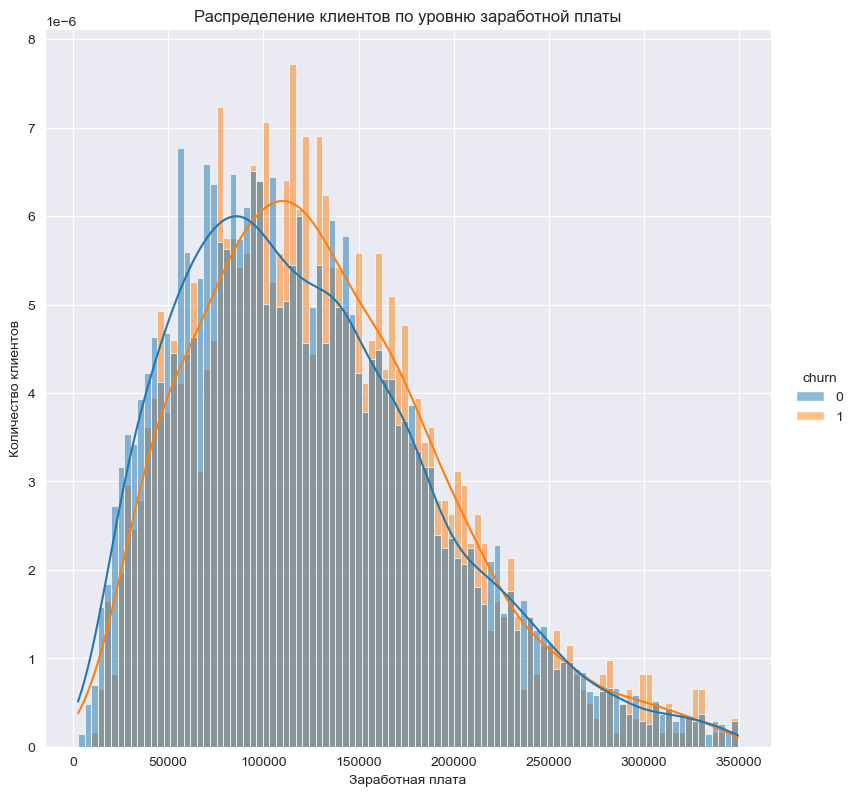

In [64]:
#Такой график мы уже строили выше, построим еще раз, чтобы взглянуть на распределение.
sns.displot(df[df['est_salary'] < 350000],x='est_salary',hue='churn', bins = 100,  height=8, kde = True, stat='density', common_norm=False)
plt.title('Распределение клиентов по уровню заработной платы')
plt.xlabel('Заработная плата')
plt.ylabel('Количество клиентов')
plt.show()

Итак, сформулируем нулевую и альтернативную гипотезы для нашего теста. Уровень статистической значимости поставим 0.05

Нулевая гипотеза:  Доход лояльных клиентов банка равен доходу отточных клиентов.

Альтернативная гипотеза: Доход лояльных клиентов банка и доход отточных клиентов различаются.

In [65]:
alpha=0.05 

def t_test(sample1,sample2, i, a):
    results = st.ttest_ind(
    sample1[i], 
    sample2[i], equal_var=a)
   
    print('p-значение:', results.pvalue)
    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

In [66]:
t_test(sample_0,sample_1,'est_salary', False)

p-значение: 0.8887054822123845
Не получилось отвергнуть нулевую гипотезу


<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Пожалуйста, повтори эту проверку ниже при помощи u-критерия Манна-Уитни, если между методами возникнет разница, прокомментируй, почему она возникла. Какой критерий тут будет точнее и почему?
</div>


**Вывод** 

Доходы лояльных и отточных клиентов равны. Мы получили подтверждение, о чем я писал ранее - доход не влияет на уровень отточности.

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Оценка при помощи u-критерия Манна-Уитни добавлена. Выводы ниже
</div>

Нулевая гипотеза: Распеределение уровня зарплат отточных клиентов равно распределению зарплат лояльных клиентов
    
Альтернативная гипотеза: Распеределение уровня зарплат отточных клиентов не равно распределению зарплат лояльных клиентов

In [67]:
from scipy.stats import mannwhitneyu
def mann_whitney_test(sample1, sample2, i):
    results = mannwhitneyu(sample1[i], sample2[i], alternative='two-sided')
    
    print('p-значение:', results.pvalue)
    if (results.pvalue < alpha):
        print("Отвергаем нулевую гипотезу")
    else:
        print("Не получилось отвергнуть нулевую гипотезу")

In [68]:
mann_whitney_test(sample_0, sample_1, 'est_salary')

p-значение: 0.000243559272811695
Отвергаем нулевую гипотезу


Тест Манна-Уитни дает противоположные результаты относительно t-test. Теория гласит, что если дисперсии выборок не равны (а в нашем случае он не равны), то предпочтение следует отдавать тесту Манна-Уитни. В нашем случае, взглянем на график. Действительно выборки очень похожи, но все-таки выборка с отточными клиентами слегка сдвинута вправо по оси абсцисс. Есть основания доверять результатам теста Манна-Уитни. Мы можем утверждать, что уровень дохода отточных клиентов превышает уровень дохода лояльных.

<div class="alert alert-danger"><b>Комментарий ревьюера 2</b>&nbsp;🚫<br>
Наличие или отсутствие разницы дисперсий никак не связано с выбором теста.
</div><div class="alert alert-warning"><b>Комментарий ревьюера 2</b>&nbsp;📌<br>Часто говорят что t-критерий требует нормальности распределения. Так как выборки большие, то нам неважно, что они распределены ненормально, мы можем использовать t-критерий. Требование нормальности распределения происходит из медицинской литературы, где традиционно маленькие выборки. 
    
<blockquote>Выборочные средние должны быть нормально распределены.
А если выборка всего одна, то её среднее должно иметь нормальное распределение для разных выборок этого размера из определённой генеральной совокупности.
Это условие не препятствие. Благодаря ЦПТ, если размер выборки составляет хотя бы несколько десятков значений, выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности. Напомним, это утверждение верно, даже если сама генеральная совокупность не распределена нормально.

Очень часто это условие путают с необходимостью нормального распределения самих генеральных совокупностей. Для корректного использования t-теста это необязательно.</blockquote>
Таким образом нормальное распределение для выборок более 30-50 элементов не требуется для t-теста. Требуется отсутствие большого числа выбросов, так как это не робастный критерий. Но выбросы можно отфильтровать.

При разном размере выборок, который нам тут известен мы ставим equal_var в положение False просто из-за особенностей работы метода ttest_ind. И вообще, надёжнее при любых сомнениях ставить его в это положение, это лишь немного снижает мощность данного стат критерия. В среднем у u-критерия Манна-Уитни мощность выше, чем у t-критерия, т.е. он чаще даёт более точный результат. В литературе встречаются утверждения, что его нельзя проводить, если есть значительное число повторяющихся значений или если выборки большие, однако это относится, видимо, к старым реализациям теста.

Основной минус критерия Манна-Уитни — его слабая интерпретируемость для бизнеса. Если мы сраниваем суммы покупок, то t-критерий позволяет нам сравнить средний чек — величину, которую можно перевести в выручку, умножив на количество покупок. U-критерий же, по сути, будет сравнивать медианный чек, который практически не используется.
</div>

### Гипотеза о различии кредитного рейтинга

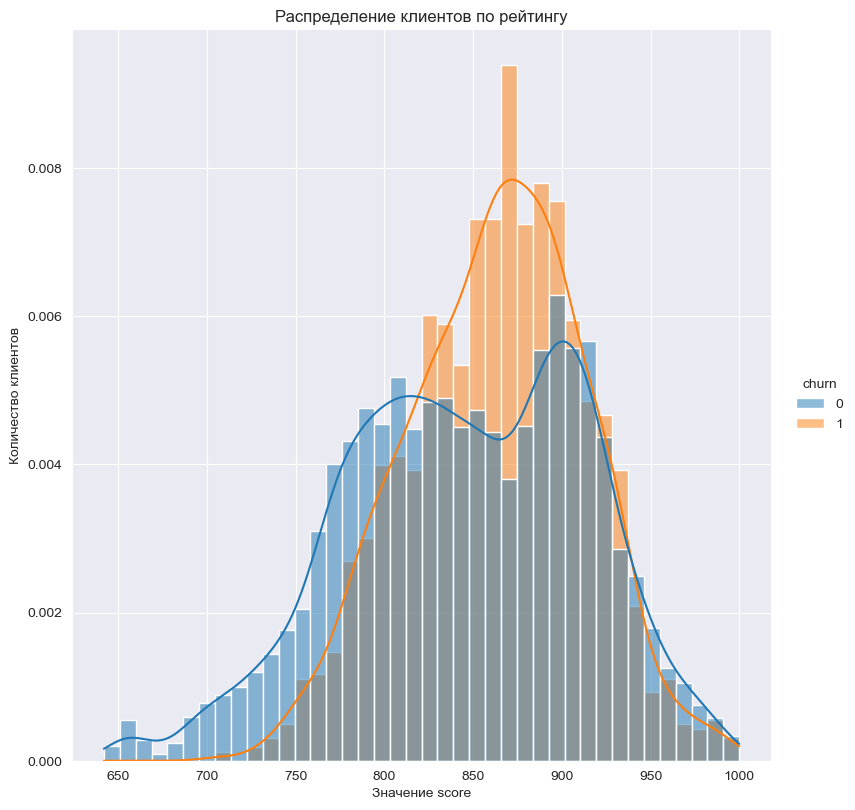

In [69]:
sns.set_style("darkgrid")
sns.displot(df,x='score',hue='churn', height=8, kde = True, stat='density', common_norm=False)
plt.title('Распределение клиентов по рейтингу')
plt.xlabel('Значение score')
plt.ylabel('Количество клиентов')
plt.show()

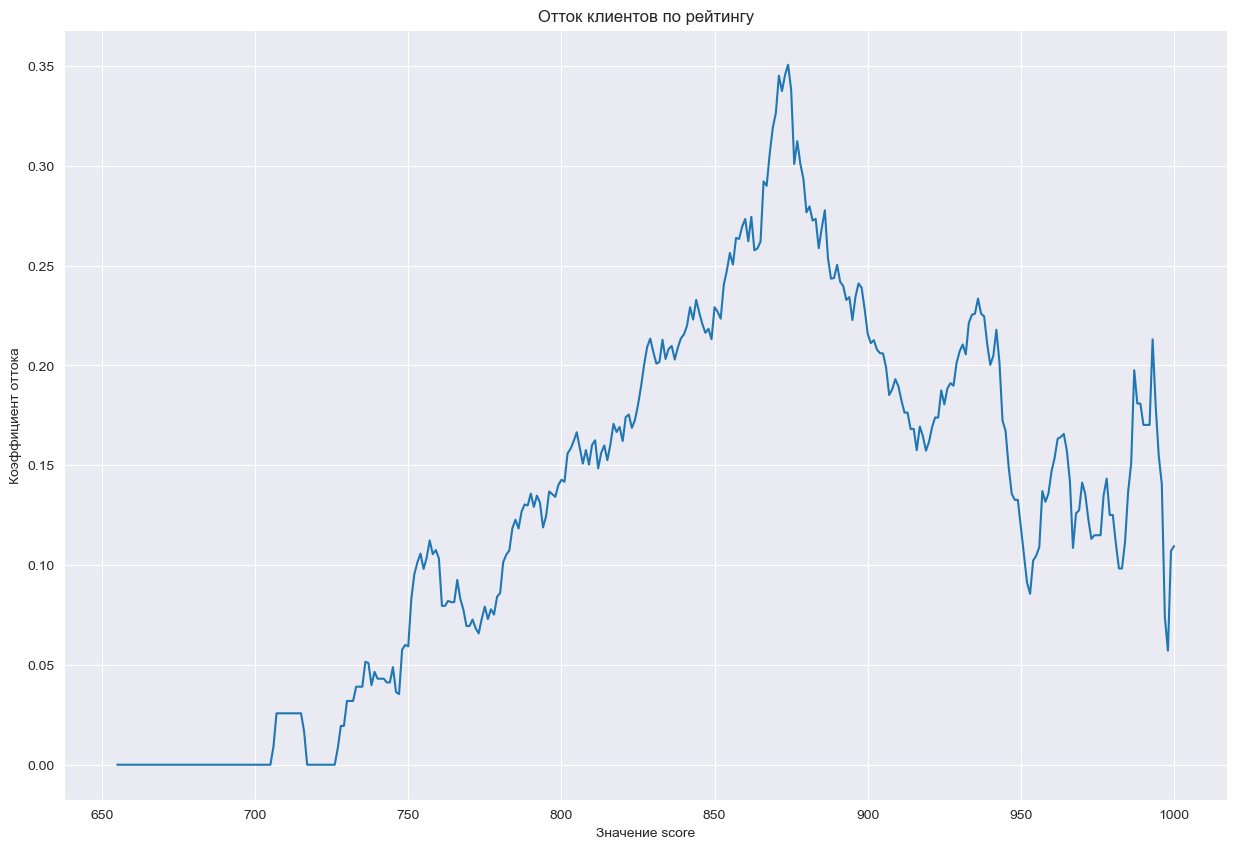

In [70]:
churn_by_score = df.groupby('score')['churn'].mean().reset_index()

churn_by_score['churn_smoothed'] = churn_by_score['churn'].rolling(window=10).mean()
plt.figure(figsize=(15, 10))
sns.set_style("darkgrid")
sns.lineplot(x='score', y='churn_smoothed', data=churn_by_score)
plt.title('Отток клиентов по рейтингу')
plt.xlabel('Значение score')
plt.ylabel('Коэффициент оттока')
plt.show()

<div class="alert alert-warning"><b>Комментарий ревьюера&nbsp;<big>👍</big></b>нанести линию среднего оттока и можно в презентацию</div><div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;💡<br>
Лучше сделать .round(-1) на данных и посчитать уровень оттока, чем делать скользящее сглаживание
</div>

Уже глядя на данный график, можно сказать, что есть существенные различия в кредитном рейтинге, среди ушедших пользователей относительно оставшихся. Осталось подтвердить это статистическим тестом.

In [71]:
#Сравним значения дисперсии
display(sample_0['score'].var(), 
        sample_1['score'].var(),
        sample_0['score'].var()/sample_1['score'].var())

4630.492360930298

2461.3013731732754

1.8813187248826646

Сформулируем нулевую и альтернативную гипотезы:

Нулевая гипотеза - значение кредитного рейтинга между оставшимися и ушедними пользователями одинаково. 

Альтернативная гипотеза - кредитный рейтинг оставшихся и ушедших пользователей отличается.

In [72]:
#Аналогично проведем t-test так как значения дисперсии сопоставимы, но не равны
t_test(sample_0,sample_1,'score', False)

p-значение: 1.2043086927657869e-37
Отвергаем нулевую гипотезу


Мы подтвердили наши предположения о том, что значения кредитного рейтинга влияет на отток пользователей. Самый "опасный" диапазон - значения от 850 до 900 баллов.

<div class="alert alert-success"><b>Комментарий ревьюера</b>&nbsp;✔️<br>
Гипотезы сфомулированы верно, расчёты проведены и интерпретированы корректно
</div>

## Портрет клиента

In [73]:
# Небольшой комментарий по поводу метрики и кластеризации
# Я не успел пройти тему про ML, поэтому задание "со звездочкой" про кластеризацию не выполняю
# Оценку признаков делаю на основе EDA

### Оценка признаков

Перечислим по порядку все признаки, которые нам удалось изучить и дадим оценку их влияния на лояльность клиента.

**Кредитный рейтинг**

Если смотреть на соотношение лояльных и отточных клиентов, то можно увидеть, что пик отточности приходится на средне-высокие показатели рейтинга.

Таким образом, мы можем назвать наиболее лояльными клиентов с низким, низко-средним и очень высоким уровнями кредитного рейтинга. 

**Преобладание отточных клиентов - рейтинг 830-930, преобладание лояльных клиентов рейтинг 0-830, 930 +**


**Город**

Значимого влияния проживания в том или ином городе на лояльность клиентов не выявлено. Чуть более лояльны клиенты из Рыбинска, но разница чрезвычайно мала.

**Преобладание отточных клиентов - Яровславль, Ростов. Преобладание лояльных клиентов - Рыбинск**


**Пол**

Женщины показали себя заметно более лояльными клиентами, чем мужчины. Можем смело назвать пол ключевым фактором в вопросе лояльности. Также имеет смысл отдавать предпочтнение при привлечении (например, при выдаче кредита) семейное положение. Таким образом, мы отдаем предпочтение женатым мужчинам по сравнению с холостыми.

**Преобладание отточных клиентов - мужчины, преобладание лояльных клиентов - женщины**


**Возраст**

Пик отточности приходится на зрелый и предпенсионный возраст. Самую высокую лояльность демонстрируют пенсионеры (старше 60). Возраст также можно считать ключевым фактором в оценке лояльности.

**Преобладание лояльных клиентов - 18-25 лет, 35-50 лет, 60+. Преобладание отточных клиентов - 25-35, 50-60 лет.**


**Количество активов**

Чем больше активов заявлено - тем больше коэффициент оттока. Нет смысла привлекать клиентов с большим количеством активов, наоборот, надо привлекать тех, у кого ничего нет (например - ипотечников). По всем исследованиям, ипотечные заемщики являеются наиболее лояльными клиентами банков.

**Преобладание лояльных клиентов - 3 и менее активов**
**Преобладание отточных клиентов - 4 и более актива**


**Баланс**

Чем больше баланс, тем выше отточность, корреляция достигает 0.09 пункта. Необходимо работать над процентной ставкой по вкладами. Скорее всего деньги не уходят "в никуда", а к конкурентам с более привлекательным условиями по вкладам.

Необходимо выяснить причины возникновения пропусков в графе баланс. Их появление я считаю противоестественным. Для любого банка баланс - ключевой показатель. Невозомжно представить банк, который будет знать возраст, пол и количество активов у клиента, но не сможет назвать баланс его счета.

В процессе исследования я выдвинул гипотезу о том, что люди с пропуском в графе баланс - должники или ипотечники. Потому как можно отметить очень высокую корреляцию с нулем в графе активы и низким использованием других продуктов банка. Также у этих пользователей очень низкие показатели отточности, что косвенно указывает на то, что они могли бы быть ипотечниками.  

**Преобладание отточных клиентов - баланс выше 750000 рублей.
Преобладание лояльных клиентов - баланс менее 750000 рублей**


**Наличие кредитной карты**

У 68% клиентов есть кредитная карта - можно утверждать, что данный признак достаточно широко распространен. Есть заментая корреляция в -0.13 пунктов к отточности. Наличие кредитной карты снижает вероятность оттока. Это верно для всех кредитных продуктов, если верить другим исследованиям на эту тему.

**Преобладание отточных клиентов в группе, где нет кредитной карты. Преобладание лояльных клиентов в группе клиентов, у кого есть кредитная карта**


**Заработная плата (доход)**

У нашего банка просто замечательные клиенты - средний доход в три раза превышает размер заработной платы по региону за 2022 год, если верить официальной статистике.

Однако, по результатам статистического теста и матрицы корреляции, мы можем утверждать, что размер з/п не влияет на лояльность клиентов.

**Преобладание лояльных клиентов в группе с доходом менее 100000 рублей.
Преобладание отточных клиентов - с доходом более 100000 рублей**


**Активность**

Чем выше активность, тем больше шанс оттока. Это можно объяснить тем, что нельзя уведомить о желании прекратить сотрудничество кроме как, зайдя в приложение и ответив так вопрос о дальнейшем сотрудничестве.

Другое объянение состоит в том, что более активные клиенты чаще могут мониторить рынок на предмет более выгодных предложений от других банков.

**Преобладание отточных клиентов в группе с высокой активностью**
**Преобладание лояльных клиентов в группе с низкой активностью**

**Количество продуктов**

Чем больше продуктов, тем больше шанс уйти. Не совсем ясно, ставя галочку напротив желания прекратить сотрудничество в приложении, клиенты таким образом показывают желание отказаться от 1 продукта или полностью прекратить сотрудничество с нашим банком? Рост отточных клиентов по данному показателю прямо пропорционален количеству используемых продуктов и данную зависимость можно было бы объяснить именно таким образом.

**Преобладание отточных среди клиентов использующих 2 и более продукта**

**Преобладание лояльных среди клиентов использующих 1 продукт**

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Мы считаем что клиенты уходят совсем, а не только отказываются от 1 продукта.
    
Нужно указать - более неотточны, чем в среднем по банку клиенты с количеством продуктов от __ до __ - должны быть конкретные значения, и так по всем характеристикам.
</div>

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Конкретные значения добавлены в описание. Выделено полужирным. Данные значение использованы для построения метрики лояльности. Также добавил это в презентацию
</div>

<div class="alert alert-success"><b>Комментарий ревьюера 2&nbsp;<big>✔️</big></b></div>

### Целевые группы

<div class="alert alert-danger"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Нету никакой метрики ценности клиентов. Нужна любая.
</div>

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Метрика для оценки ляольности клиентов предложена ниже
</div>

<div class="alert alert-danger"><b>Комментарий ревьюера 2</b>&nbsp;🔴<br>
<b>Ценность</b> клиента зависит от его баланса, зарплаты, скора, возможно баллов собственности.
</div>

#### Метрика лояльности клиентов

Предлагаю использовать следующую метрику: Если клиент попадает в категории с преобладанием лояльных клиентов, то добавляем 1 балл, если попадает в категорию с преобладанием отточных - не добавляем ничего. Создадим функцию для подсчета баллов и создадим столбец, который будет показывать число баллов у каждого клиента.

In [74]:
# Создаем функцию для расчета метрики
def calculate_loyalty_score(row):
    score = 0
    
    # Кредитный рейтинг
    if row['score'] < 830:
        score += 1
    elif row['score'] >= 830 and row['score'] <= 929:
        score += 0
    elif row['score'] > 930:
        score += 1
    
    # Город
    if row['city'] == 'Рыбинск':
        score += 1
    elif row['city'] == 'Ярославль' or row['city'] == 'Ростов':
        score += 0
    
    # Пол
    if row['gender'] == 'Ж':
        score += 1
    elif row['gender'] == 'М':
        score += 0
    
    # Возраст
    if row['age'] >= 18 and row['age'] <= 24:
        score += 1
    elif row['age'] >= 25 and row['age'] <= 34:
        score += 0
    elif row['age'] >= 35 and row['age'] <= 49:
        score += 1
    elif row['age'] >= 50 and row['age'] <= 59:
        score += 0
    elif row['age'] >= 60:
        score += 1
    
    # Количество активов клиента
    if row['equity'] >= 0 and row['equity'] <= 3:
        score += 1
    elif row['equity'] >= 4:
        score += 0
    
    # Баланс
    if row['balance'] < 750000:
        score += 1
    elif row['balance'] >= 750000:
        score += 0
    
    # Количество продуктов
    if row['products'] == 1:
        score += 1
    elif row['products'] >= 2:
        score += 0
    
    # Наличие кредитной карты
    if row['credit_card'] == 1:
        score += 1
    elif row['credit_card'] == 0:
        score += 0
    
    # Доход
    if row['est_salary'] < 100000:
        score += 1
    elif row['est_salary'] >= 100000:
        score += 0
    
    # Активность клиента
    if row['last_activity'] == 'Низкая':
        score += 1
    elif row['last_activity'] == 'Высокая':
        score += 0
    
    return score

# Применяем функцию к датафрейму и добавляем столбец с метрикой
df['loyalty_score'] = df.apply(calculate_loyalty_score, axis=1)
df['loyalty_score'].value_counts()

5    2407
4    2343
3    1635
6    1551
2     843
7     629
1     375
8     125
0      76
9      16
Name: loyalty_score, dtype: int64

<div class="alert alert-warning"><b>Комментарий ревьюера 2</b>&nbsp;⚠️<br>
Мы и так увидим лояльность по уровню оттока.
</div>


#### Портреты

Соберем портреты типичных клиентов из нескольких признаков.

**Клиент 1** Женщина, возраст 60+, мало продуктов, мало активов. Ориентировочный продукт - пенсионный вклад.

**Клиент 2** Семейная пара (оставим признак "женщина", подразумевая, что наличие хотя бы одной женщины - обязательный признак для формирования семейной пары), до 40 лет, есть кредитная карта, высокий доход, меньше двух активов. Ориентировочный продукт - ипотечный кредит.

**Клиент 3** Мужчина среднего возраста (от 30 до 60 лет), более 1 млн на балансе, нет крединтной карты, активный, имеет имущество. Ориентировочный продукт - программа лояльности. **Отточный, но высокомаржинальный клиент**

In [75]:
client_1 = df.query("gender == 'Ж' and age_group == 'старше 60 лет' and products < 3 and equity < 3")
client_1.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Yaroslavl,Rybinsk,Rostov,nan_balance,loyalty_score
count,309.00,309.00,309.00,309.00,153.00,309.00,309.00,309.00,309.00,309.00,309.00,309.00,309.00,309.00,309.00
mean,170714.55,845.06,66.51,0.68,394700.82,1.44,0.65,0.57,125321.11,0.01,0.54,0.27,0.19,0.50,5.96
std,32796.81,73.57,4.85,0.85,337725.24,0.50,0.48,0.50,144120.94,0.11,0.50,0.45,0.39,0.50,1.17
min,114422.00,642.00,61.00,0.00,86.00,1.00,0.00,0.00,5341.50,0.00,0.00,0.00,0.00,0.00,3.00
25%,141106.00,791.00,63.00,0.00,213000.36,1.00,0.00,0.00,51640.34,0.00,0.00,0.00,0.00,0.00,5.00
50%,173522.00,861.00,65.00,0.00,296465.47,1.00,1.00,1.00,85959.63,0.00,1.00,0.00,0.00,1.00,6.00
75%,196871.00,906.00,69.00,2.00,430659.12,2.00,1.00,1.00,136944.84,0.00,1.00,1.00,0.00,1.00,7.00
max,227759.00,979.00,86.00,2.00,2073184.29,2.00,1.00,1.00,1076227.99,1.00,1.00,1.00,1.00,1.00,9.00


In [76]:
client_2 = df.query("gender == 'Ж' and (age_group == 'до 30 лет' or age_group == '30-35 лет' or age_group == '35-40 лет') and credit_card == 1 and equity < 2 and est_salary > 100000")
client_2.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Yaroslavl,Rybinsk,Rostov,nan_balance,loyalty_score
count,386.00,386.00,386.00,386.00,85.00,386.00,386.00,386.00,386.00,386.00,386.00,386.00,386.00,386.00,386.00
mean,172219.09,853.64,34.22,0.17,218069.19,1.31,1.00,0.54,227446.93,0.02,0.68,0.25,0.06,0.78,5.28
std,33541.25,88.47,4.09,0.38,259894.70,0.57,0.00,0.50,188277.33,0.12,0.47,0.44,0.24,0.41,0.99
min,114209.00,649.00,20.00,0.00,48.00,1.00,1.00,0.00,100262.67,0.00,0.00,0.00,0.00,0.00,3.00
25%,143894.25,776.50,31.25,0.00,106192.92,1.00,1.00,0.00,135594.23,0.00,0.00,0.00,0.00,1.00,5.00
50%,173808.00,894.00,35.00,0.00,150607.99,1.00,1.00,1.00,169134.92,0.00,1.00,0.00,0.00,1.00,5.00
75%,201982.25,919.75,37.00,0.00,268008.01,2.00,1.00,1.00,223238.35,0.00,1.00,1.00,0.00,1.00,6.00
max,229145.00,980.00,40.00,1.00,2120560.43,5.00,1.00,1.00,1296838.08,1.00,1.00,1.00,1.00,1.00,8.00


In [77]:
client_3 = df.query("gender == 'М' and (age_group != 'до 30 лет' and age_group != 'старше 60 лет') and credit_card == 0 and equity > 1 and balance > 1000000")
client_3.describe()

,user_id,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn,Yaroslavl,Rybinsk,Rostov,nan_balance,loyalty_score
count,384.00,384.00,384.00,384.00,384.00,384.00,384.00,384.00,384.00,384.00,384.00,384.00,384.00,384.00,384.00
mean,176889.90,884.44,43.90,4.33,2404883.82,2.39,0.00,0.55,205630.83,0.56,0.60,0.26,0.14,0.00,1.56
std,36178.00,49.97,8.56,1.04,3118759.18,0.67,0.00,0.50,172036.10,0.50,0.49,0.44,0.35,0.00,0.99
min,96562.00,742.00,31.00,2.00,1000412.33,1.00,0.00,0.00,28732.06,0.00,0.00,0.00,0.00,0.00,0.00
25%,148743.00,856.00,37.00,4.00,1279669.88,2.00,0.00,0.00,118761.22,0.00,0.00,0.00,0.00,0.00,1.00
50%,176904.00,893.00,42.00,4.00,1569797.41,2.00,0.00,1.00,168326.50,1.00,1.00,0.00,0.00,0.00,1.00
75%,211411.00,919.00,52.00,5.00,2505110.70,3.00,0.00,1.00,229353.91,1.00,1.00,1.00,0.00,0.00,2.00
max,229058.00,1000.00,60.00,9.00,43277099.84,4.00,0.00,1.00,1395064.45,1.00,1.00,1.00,1.00,0.00,5.00


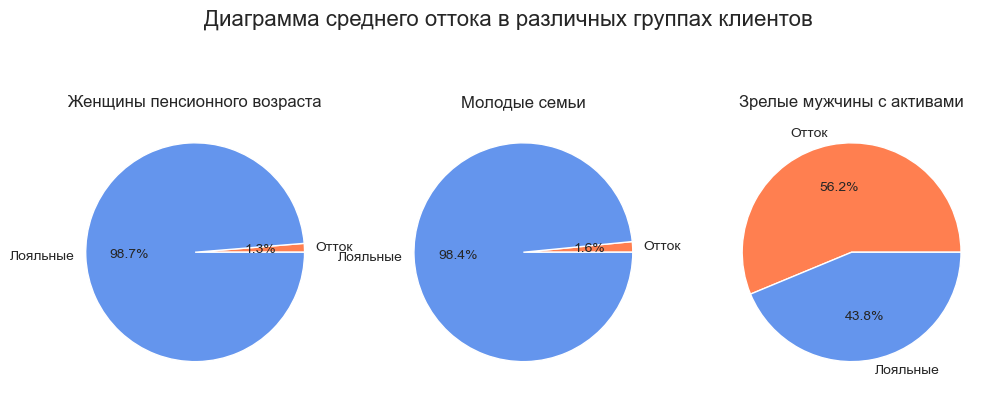

In [78]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 5))

# Клиент 1
client_1_mean_churn = client_1['churn'].mean()
ax1.pie([client_1_mean_churn, 1-client_1_mean_churn], labels=["Отток", "Лояльные"], autopct='%1.1f%%', 
        colors = ['#FF7F50','#6495ED'])
ax1.set_title('Женщины пенсионного возраста')

# Клиент 2
client_2_mean_churn = client_2['churn'].mean()
ax2.pie([client_2_mean_churn, 1-client_2_mean_churn], labels=["Отток", "Лояльные"], autopct='%1.1f%%',
        colors = ['#FF7F50','#6495ED'])
ax2.set_title('Молодые семьи')

# Клиент 3
client_3_mean_churn = client_3['churn'].mean()
ax3.pie([client_3_mean_churn, 1-client_3_mean_churn], labels=["Отток", "Лояльные"], autopct='%1.1f%%',
        colors = ['#FF7F50','#6495ED'])
ax3.set_title('Зрелые мужчины с активами')

# Задаем общий заголовок для фигуры
fig.suptitle('Диаграмма среднего оттока в различных группах клиентов', fontsize=16)

plt.show()

<div class="alert alert-danger"><b>Комментарий ревьюера</b>&nbsp;👀<br>
Нам точно нужен сегмент с 56% оттоком? Как он у нас появился?
</div>

<div class="alert alert-block alert-info">
  
  <b>Комментарий cтудента</b>
    
  Наше исследование показывает, что лояльными являются наименее платежеспособные клиенты - пенсионеры, молодежь, люди с низким доходом, без активов, потребители кредитов. Все высокомаржинальные клиенты - отточные.    
    Я отдельно выделил эту группу с 55 оттоком, чтобы подстветить данный результат для банка.
    Я считаю логичным для банка работать не только в сторону привлечения низкомаржинальных клиентов, но также задуматься над введением программы лояльности для наиболее ценных клиентов. Именно поэтому я подсвечиваю данную группу. 
</div>

Отсюда мы можем сделать вывод, что банк может сосредоточиться на продвижении трех следующих услуг:
    
**Пенсионный накопительный вклад**

**Ипотечное кредитование молодых семей**

**Программа лояльности для владельцев активов**

<div class="alert alert-danger"><b>Комментарий ревьюера 2</b>&nbsp;🔧<br>
Каждая из рекомендаций должна быть таргетирована на конкретный сегмент.
</div>

## Выводы и рекомендации

Мы провели анализ лояльности клиентов банка Метанпром.

Выводы:
    
1. Банку следует проверить, почему остутствуют записи о балансе банковского счета большого числа клиентов. Баланс банковского счета - основной показатель клиента банка. Невозможно себе представить, что банк знает возраст и доход клиента, но не знает состояние его банковского счета. Я выдвинул предположение, на основе анализа корреляции наличия пропусков в графе баланс, о том, что те, в чьих полях допущены пропуски - ипотечники (или другие должники банка с отрицательным балансом. Так или иначе, эту информацию нужно проверить в первостепенном порядке.

2. Ключевыми факторами являются антропометрические - возраст и пол клиента. Есть заметные особенности в поведении групп, разделенных по возрасту и полу. Например, женщины, в целом, более лояльны, чем мужчины. Пик оттока приходится на возрастные группы в 30-40 лет и 50-60 лет. Это верно для обоих полов.

3. Географические факторы при анализа датасета не показали серьезного влияния на показатель лояльности. Чуть более лояльные клиенты в Рыбинске, но разница с отсальными городами небольшая.

4. То же самое можно сказать про уровень дохода клиентов - уровень дохода не влияет на лояльность. Стоит отметить, что в нашем банке собрались очень ценные клиенты - уровень их дохода в среднем в три раза выше, чем в среднем по региону. Поэтому, вместо того, чтобы привлекать новых клиентов, имеет смысл задуматься над сохранением лояльности уже имеющихся.

5. Влияние остальных факторов на лояльность подробно описано в разделе 5. Еще раз отмечу, что больше все на лояльность влияют возраст и пол клиентов, а также баланс счета и количество активов. Чем больше активов и выше баланс - чем больше клиент смотрит в сторону от нашего банка. Сохранение пободных клиентов является первостепенной задачей.

6. Я выделил два портрета лояльных и один портрет отточного клиента. 

Клиент 1 Женщина, возраст 60+, мало продуктов, мало активов. Ориентировочный продукт - пенсионный вклад.

Клиент 2 Семейная пара (оставим признак "женщина", подразумевая, что наличие хотя бы одной женщины - обязательный признак для формирования семейной пары), до 40 лет, есть кредитная карта, высокий доход, меньше двух активов. Ориентировочный продукт - ипотечный кредит.

Клиент 3 Мужчина среднего возраста (от 30 до 60 лет), более 1 млн на балансе, нет крединтной карты, активный, имеет имущество. Ориентировочный продукт - программа лояльности.

7. Необходимо провести оценку сколько дохода для банка может привести привлечение клиентов из групп 1 и группы 2. Сравнить это с расходами на удержание клиентов группы 3. Можно предположить, что расходы на удержание клиентов могуть быть меньше, чем расходы на привлечение. Несмотря на то, что обозначенные выше группы (1 и 2) являются наиболее лояльными, они могут оказаться наименее интересными банку с точки зрения потенциального дохода.

8. Данные об использовании продуктов клиентами необходимо расширить - добавить в него тип используемого продукта (сберегательный/кредитный) - это поможет для дальнейшего анализа оттока клиентов.

Ссылка на презентацию: <https://disk.yandex.com/i/BwyHpqEUOu8ocg>

<div class="alert alert-warning"><b>Комментарий ревьюера</b>&nbsp;🔧<br>
Не везде соблюдён баланс графической и текстовой информации - слайд "Матрица корреляций" не содержит тезисов.
    
Нет корректных диаграмм по показателям в разрезе оттока и по уровню оттока.
    
Нет портретов отточных и неотточных клиентов.
    
Нет даты, на презентацию будет сложно сослаться.
</div>

Работа с презентацией:

Добавлены тезисы на слайд с матрицей корреляций.

Добавлены графики, показывающие уровень отточности для различных критериев.

Побробнее описаны критерии для попадания в лояльные и отточные группы.

Добавлена дата составления презентации.

Ссылка на обновленную презентацию: <https://disk.yandex.ru/i/RfOqSmJUP1e_EA>

<div class="alert alert-success"><b>Комментарий ревьюера 2</b>&nbsp;✔️<br>
Формат pdf, есть дата, автор, в начале указаны цели, соблюдён баланс графической и текстовой информации, слайды по ключевым моментам работы:

* есть портреты клиентов
* есть корреляционный анализ
* есть диаграммы по показателям по уровню оттока
* есть выводы и рекомендации
</div>


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   user_id        10000 non-null  int64   
 1   score          10000 non-null  float64 
 2   city           10000 non-null  object  
 3   gender         10000 non-null  object  
 4   age            10000 non-null  float64 
 5   equity         10000 non-null  int64   
 6   balance        7705 non-null   float64 
 7   products       10000 non-null  int64   
 8   credit_card    10000 non-null  int64   
 9   last_activity  10000 non-null  int64   
 10  est_salary     10000 non-null  float64 
 11  churn          10000 non-null  int64   
 12  Yaroslavl      10000 non-null  int64   
 13  Rybinsk        10000 non-null  int64   
 14  Rostov         10000 non-null  int64   
 15  nan_balance    10000 non-null  int64   
 16  age_group      10000 non-null  category
 17  loyalty_score  10000 non-null  i